# Modelos de aprednizado de máquinas voltados para tarefas de classificação

# 1. Importação e leitura dos dados

**Importação dos dados**

In [1]:
# Package
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


**Leitura dos dados**

In [2]:
getSymbols("^GSPC", from = '2000-01-01', to = '2021-05-31')   # dataset escolhido: US

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "^GSPC"

# 2. Inspeção do dataset

**Inspeção da frequência dos dados**

In [3]:
periodicity(GSPC)

Daily periodicity from 2000-01-03 to 2021-04-14 

**Inspeção das primeiras linhas**

In [4]:
head(GSPC)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2000-01-03   1469.25   1478.00  1438.36    1455.22   931800000       1455.22
2000-01-04   1455.22   1455.22  1397.43    1399.42  1009000000       1399.42
2000-01-05   1399.42   1413.27  1377.68    1402.11  1085500000       1402.11
2000-01-06   1402.11   1411.90  1392.10    1403.45  1092300000       1403.45
2000-01-07   1403.45   1441.47  1400.73    1441.47  1225200000       1441.47
2000-01-10   1441.47   1464.36  1441.47    1457.60  1064800000       1457.60

**Análise gráfica**

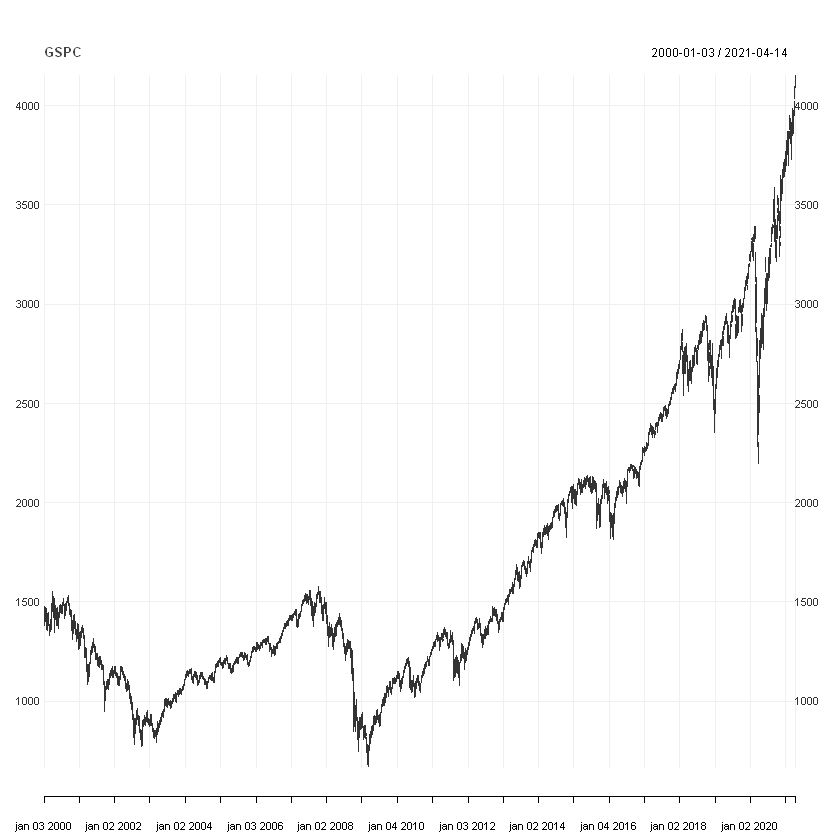

In [5]:
chart_Series(GSPC)

# 3. Construção das variáveis

In [6]:
# Package
library(TTR)

In [7]:
v.excluded <- c('GSPC.Open', 'GSPC.Volume', 'GSPC.Adjusted')

GSPC2 <- GSPC[, !(names(GSPC) %in% v.excluded)]

In [8]:
dim(GSPC2)

[1] 5354    3

## 3.1. Variáveis técnicas

In [9]:
# Log-Returns
GSPC.Return <- ts(round(log(GSPC2$GSPC.Close) - log(Lag(GSPC2$GSPC.Close, 1)), 2))

# Simple moving average (SMA)
GSPC.SMA <- ts(round(SMA(GSPC2$GSPC.Close, 10), 2))  # 10 days

# Weighted moving average (WMA)
GSPC.WMA <- ts(round(WMA(GSPC2$GSPC.Close, 10), 2))  # 10 days

# Standard deviation (STD)
GSPC.STD10 <- ts(round(rollapply(GSPC$GSPC.Close, 10, sd), 2))

# Momentum (mom)
GSPC.MOM <- ts(round(momentum(GSPC2$GSPC.Close, n = 1), 2))

# Rate Of Change (ROC)
GSPC.ROC <- ts(round(ROC(GSPC2$GSPC.Close), 2))

# Stochastic K% AND D%
GSPC.StochK <- ts(round(stoch(GSPC2)$fastK, 2))    # fastK
GSPC.StochD <- ts(round(stoch(GSPC2)$fastD, 2))    # fastD

# Relative Strength Index (RSI)
GSPC.RSI <- ts(round(RSI(GSPC2$GSPC.Close, n = 7, maType = "SMA"), 2))

# William's %R (WPR)
GSPC.WPR <- ts(round(WPR(GSPC2, n = 14), 2))

# The Average Direction Index (trend strength) (ADX) & The Direction Index (DX)
GSPC.ADX <- ts(round(ADX(GSPC2)$ADX, 2))
GSPC.DX <- ts(round(ADX(GSPC2)$DX, 2))

# Commodity Channel Index (CCI)
GSPC.CCI <- ts(round(CCI(GSPC2), 2))

# Chande Momentum Oscillator (CMO)
GSPC.CMO <- ts(round(CMO(GSPC$GSPC.Close), 2))

# Triple Smoothed Exponential Oscillator (TRIX)
GSPC.TRIX <- ts(round(TRIX(GSPC$GSPC.Close)$TRIX, 2))

# Moving Average Convergence Divergence (MACD)
GSPC.MACD <- ts(round(MACD(GSPC2$GSPC.Close, 12, 26, 9, maType = "EMA")$macd, 2))
GSPC.Signal <- ts(round(MACD(GSPC2$GSPC.Close, 12, 26, 9, maType = "EMA")$signal, 2))
GSPC.Histogram <- ts(round(GSPC.MACD - GSPC.Signal, 2))

# Bollinger Bands (BBANDS)
GSPC.bbup <- BBands(GSPC2, n = 20, sd = 2)$up
GSPC.bbdn <- BBands(GSPC2, n = 20, sd = 2)$dn
GSPC.BBANDS <- ts(round(GSPC.bbup - GSPC.bbdn, 2))

In [10]:
v.technical <- cbind(GSPC.Return, GSPC.SMA, GSPC.WMA, GSPC.STD10, GSPC.MOM, GSPC.ROC, GSPC.StochK, GSPC.StochD, GSPC.RSI,
                     GSPC.WPR, GSPC.ADX, GSPC.DX, GSPC.CCI, GSPC.CMO, GSPC.TRIX, GSPC.MACD, GSPC.Signal, GSPC.Histogram,
                     GSPC.BBANDS)

In [11]:
dim(v.technical)

[1] 5354   19

In [12]:
GSPC.df <- as.data.frame(cbind(GSPC2, v.technical))
head(GSPC.df)

GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
1478.00,1438.36,1455.22,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1455.22,1397.43,1399.42,-0.04,NA,NA,NA,-55.80,-0.04,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1413.27,1377.68,1402.11,0.00,NA,NA,NA,2.69,0.00,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1411.90,1392.10,1403.45,0.00,NA,NA,NA,1.34,0.00,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1441.47,1400.73,1441.47,0.03,NA,NA,NA,38.02,0.03,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1464.36,1441.47,1457.60,0.01,NA,NA,NA,16.13,0.01,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [13]:
tail(GSPC.df)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
5349,4083.13,4068.31,4079.95,0.00,3992.74,4024.97,68.48,6.01,0.00,0.97,...,0.03,14.71,28.62,188.90,28.55,0.10,1.17,0.83,0.34,216.26
5350,4098.19,4082.54,4097.17,0.00,4013.54,4043.96,65.03,17.22,0.00,1.00,...,0.00,15.95,32.02,171.60,55.19,0.10,1.28,0.92,0.36,236.34
5351,4129.48,4095.51,4128.80,0.01,4035.47,4064.92,62.99,31.63,0.01,1.00,...,0.00,17.56,38.55,164.62,60.16,0.11,1.40,1.01,0.39,265.99
5352,4131.76,4114.82,4127.99,0.00,4050.82,4081.74,65.15,-0.81,0.00,0.99,...,0.01,19.10,39.01,141.75,56.47,0.12,1.48,1.11,0.37,290.15
5353,4148.00,4124.43,4141.59,0.00,4067.87,4098.24,64.27,13.60,0.00,0.98,...,0.02,20.75,42.33,130.61,73.27,0.13,1.56,1.20,0.36,315.02
5354,4151.69,4124.12,4124.12,0.00,4084.42,4108.47,53.39,-17.47,0.00,0.91,...,0.09,22.35,43.08,109.26,75.45,0.14,1.56,1.27,0.29,333.94


## 3.2. Variáveis de direção

In [14]:
# Direção numérica
GSPC.Direction <- NULL
GSPC.Direction[GSPC2$GSPC.Close >= lag(GSPC2$GSPC.Close, 20)] <- 1           # P(t) >= P(t-20)
GSPC.Direction[GSPC2$GSPC.Close < lag(GSPC2$GSPC.Close, 20)] <- 0            # P(t) < P(t-20)

In [15]:
# Direção não numérica
GSPC.Trend <- NULL
GSPC.Trend[GSPC2$GSPC.Close > Lag(GSPC2$GSPC.Close, 20)] <- "up"             # P(t) > P(t-20)
GSPC.Trend[GSPC2$GSPC.Close < Lag(GSPC2$GSPC.Close, 20)] <- "down"           # P(t) < P(t-20)
GSPC.Trend[GSPC2$GSPC.Close == Lag(GSPC2$GSPC.Close, 20)] <- "nowhere"       # P(t) = P(t-20)

In [16]:
head(cbind(GSPC.Direction, GSPC.Trend))

GSPC.Direction,GSPC.Trend
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA


In [17]:
tail(cbind(GSPC.Direction, GSPC.Trend))

,GSPC.Direction,GSPC.Trend
"[5349,]",1,up
"[5350,]",1,up
"[5351,]",1,up
"[5352,]",1,up
"[5353,]",1,up
"[5354,]",1,up


In [18]:
# Agregando as séries de direção ao dataset
GSPC.df1 <- as.data.frame(cbind(GSPC.df, GSPC.Direction, GSPC.Trend))
tail(GSPC.df1)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS,GSPC.Direction,GSPC.Trend
5349,4083.13,4068.31,4079.95,0.00,3992.74,4024.97,68.48,6.01,0.00,0.97,...,28.62,188.90,28.55,0.10,1.17,0.83,0.34,216.26,1,up
5350,4098.19,4082.54,4097.17,0.00,4013.54,4043.96,65.03,17.22,0.00,1.00,...,32.02,171.60,55.19,0.10,1.28,0.92,0.36,236.34,1,up
5351,4129.48,4095.51,4128.80,0.01,4035.47,4064.92,62.99,31.63,0.01,1.00,...,38.55,164.62,60.16,0.11,1.40,1.01,0.39,265.99,1,up
5352,4131.76,4114.82,4127.99,0.00,4050.82,4081.74,65.15,-0.81,0.00,0.99,...,39.01,141.75,56.47,0.12,1.48,1.11,0.37,290.15,1,up
5353,4148.00,4124.43,4141.59,0.00,4067.87,4098.24,64.27,13.60,0.00,0.98,...,42.33,130.61,73.27,0.13,1.56,1.20,0.36,315.02,1,up
5354,4151.69,4124.12,4124.12,0.00,4084.42,4108.47,53.39,-17.47,0.00,0.91,...,43.08,109.26,75.45,0.14,1.56,1.27,0.29,333.94,1,up


**Inspeção da estrutura do dataset**

In [19]:
str(GSPC.df1)

'data.frame':	5354 obs. of  24 variables:
 $ GSPC.High     : num  1478 1455 1413 1412 1441 ...
 $ GSPC.Low      : num  1438 1397 1378 1392 1401 ...
 $ GSPC.Close    : num  1455 1399 1402 1403 1441 ...
 $ GSPC.Return   : num  NA -0.04 0 0 0.03 0.01 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  NA NA NA NA NA ...
 $ GSPC.WMA      : num  NA NA NA NA NA ...
 $ GSPC.STD10    : num  NA NA NA NA NA NA NA NA NA 24.6 ...
 $ GSPC.MOM      : num  NA -55.8 2.69 1.34 38.02 ...
 $ GSPC.ROC      : num  NA -0.04 0 0 0.03 0.01 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.StochD   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.RSI      : num  NA NA NA NA NA ...
 $ GSPC.WPR      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.ADX      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.DX       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.CCI      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.CMO      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.TRIX 

# 4. Análise exploratória dos dados

## 4.1. Dados ausentes

**Identificação dos dados ausentes**

In [20]:
round(prop.table(table(is.na(GSPC.df1)))*100, digits = 2)[2]

# Mesmo com os NA's nas primeiras linhas e nas últimas linhas, o % de NA's total é inferior a 1%

TRUE 
0.28

**Remoção dos dados ausentes**

In [21]:
GSPC.df2 <- na.omit(GSPC.df1)
round(prop.table(table(is.na(GSPC.df2)))*100, digits = 2)[2]

<NA> 
  NA

**Inspeção da estrutura dos dados**

In [22]:
str(GSPC.df2)

'data.frame':	5296 obs. of  24 variables:
 $ GSPC.High     : num  1535 1527 1521 1517 1520 ...
 $ GSPC.Low      : num  1518 1507 1497 1475 1484 ...
 $ GSPC.Close    : num  1524 1508 1509 1488 1499 ...
 $ GSPC.Return   : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  1470 1485 1497 1500 1503 ...
 $ GSPC.WMA      : num  1497 1504 1508 1506 1506 ...
 $ GSPC.STD10    : num  57.4 42.8 27.9 24.8 21.5 ...
 $ GSPC.MOM      : num  -3.6 -16.13 0.79 -20.6 10.66 ...
 $ GSPC.ROC      : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  0.86 0.77 0.77 0.67 0.72 0.76 0.64 0.52 0.62 0.73 ...
 $ GSPC.StochD   : num  0.9 0.84 0.8 0.74 0.72 0.72 0.71 0.64 0.59 0.62 ...
 $ GSPC.RSI      : num  87 72 78.4 46 48.7 ...
 $ GSPC.WPR      : num  0.14 0.23 0.23 0.33 0.28 0.24 0.36 0.48 0.38 0.27 ...
 $ GSPC.ADX      : num  26.4 27.3 27.7 27 26.5 ...
 $ GSPC.DX       : num  47 39.2 32.7 18.7 19.7 ...
 $ GSPC.CCI      : num  130.5 101.7 85.4 59.7 62.6 ...
 $ GSPC.C

Como as análises exploratória e o preprocessamento de dados focam nas features, a partir deste momento trabalharemos com o dataframe sem as variáveis de direção.

In [23]:
v.direction <- c('GSPC.Direction', 'GSPC.Trend')
GSPC.df3 <- GSPC.df2[, !(names(GSPC.df2) %in% v.direction)]

In [24]:
str(GSPC.df3)

'data.frame':	5296 obs. of  22 variables:
 $ GSPC.High     : num  1535 1527 1521 1517 1520 ...
 $ GSPC.Low      : num  1518 1507 1497 1475 1484 ...
 $ GSPC.Close    : num  1524 1508 1509 1488 1499 ...
 $ GSPC.Return   : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  1470 1485 1497 1500 1503 ...
 $ GSPC.WMA      : num  1497 1504 1508 1506 1506 ...
 $ GSPC.STD10    : num  57.4 42.8 27.9 24.8 21.5 ...
 $ GSPC.MOM      : num  -3.6 -16.13 0.79 -20.6 10.66 ...
 $ GSPC.ROC      : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  0.86 0.77 0.77 0.67 0.72 0.76 0.64 0.52 0.62 0.73 ...
 $ GSPC.StochD   : num  0.9 0.84 0.8 0.74 0.72 0.72 0.71 0.64 0.59 0.62 ...
 $ GSPC.RSI      : num  87 72 78.4 46 48.7 ...
 $ GSPC.WPR      : num  0.14 0.23 0.23 0.33 0.28 0.24 0.36 0.48 0.38 0.27 ...
 $ GSPC.ADX      : num  26.4 27.3 27.7 27 26.5 ...
 $ GSPC.DX       : num  47 39.2 32.7 18.7 19.7 ...
 $ GSPC.CCI      : num  130.5 101.7 85.4 59.7 62.6 ...
 $ GSPC.C

## 4.2. Estatística descritiva

In [25]:
summary(GSPC.df3)

   GSPC.High         GSPC.Low        GSPC.Close      GSPC.Return        
 Min.   : 695.3   Min.   : 666.8   Min.   : 676.5   Min.   :-0.1300000  
 1st Qu.:1173.0   1st Qu.:1155.4   1st Qu.:1164.7   1st Qu.: 0.0000000  
 Median :1401.2   Median :1379.8   Median :1391.3   Median : 0.0000000  
 Mean   :1695.5   Mean   :1675.2   Mean   :1685.9   Mean   : 0.0001548  
 3rd Qu.:2097.1   3rd Qu.:2079.4   3rd Qu.:2088.9   3rd Qu.: 0.0100000  
 Max.   :4151.7   Max.   :4124.4   Max.   :4141.6   Max.   : 0.1100000  
    GSPC.SMA         GSPC.WMA        GSPC.STD10         GSPC.MOM        
 Min.   : 707.9   Min.   : 700.9   Min.   :  2.760   Min.   :-324.8900  
 1st Qu.:1162.9   1st Qu.:1162.6   1st Qu.:  9.938   1st Qu.:  -7.1900  
 Median :1392.3   Median :1392.7   Median : 14.905   Median :   0.9650  
 Mean   :1683.7   Mean   :1684.5   Mean   : 19.603   Mean   :   0.4903  
 3rd Qu.:2084.2   3rd Qu.:2085.7   3rd Qu.: 23.172   3rd Qu.:   8.9800  
 Max.   :4084.4   Max.   :4108.5   Max.   :245.110 

É possível analisar a frequência de cada direção não numérica

In [26]:
summary(GSPC.df2$GSPC.Trend)

down   up 
1969 3327

## 4.3. Identificação de outliers

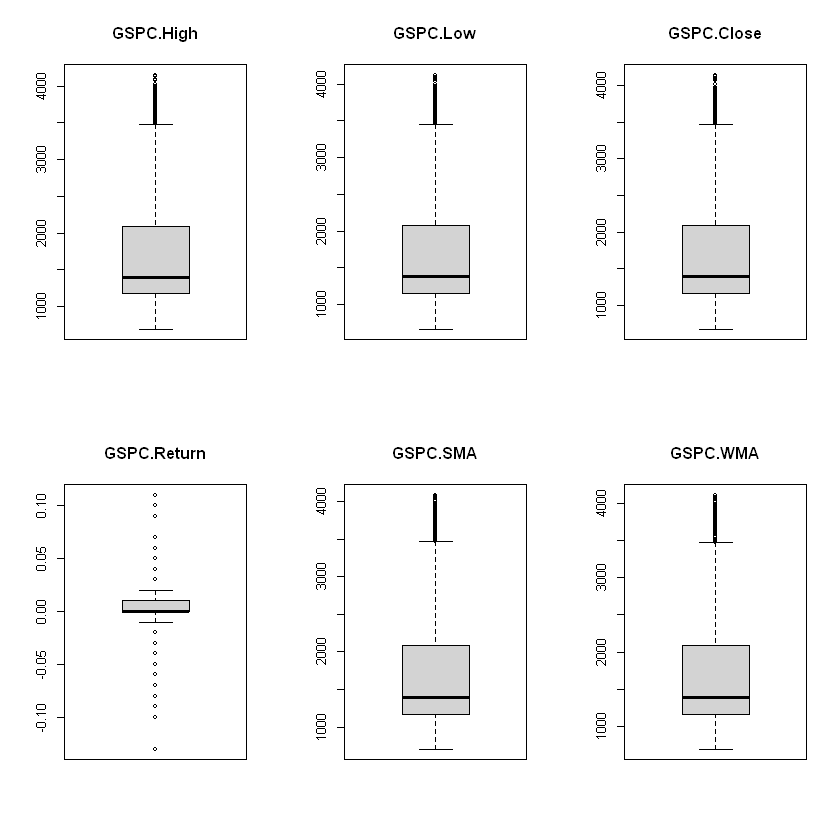

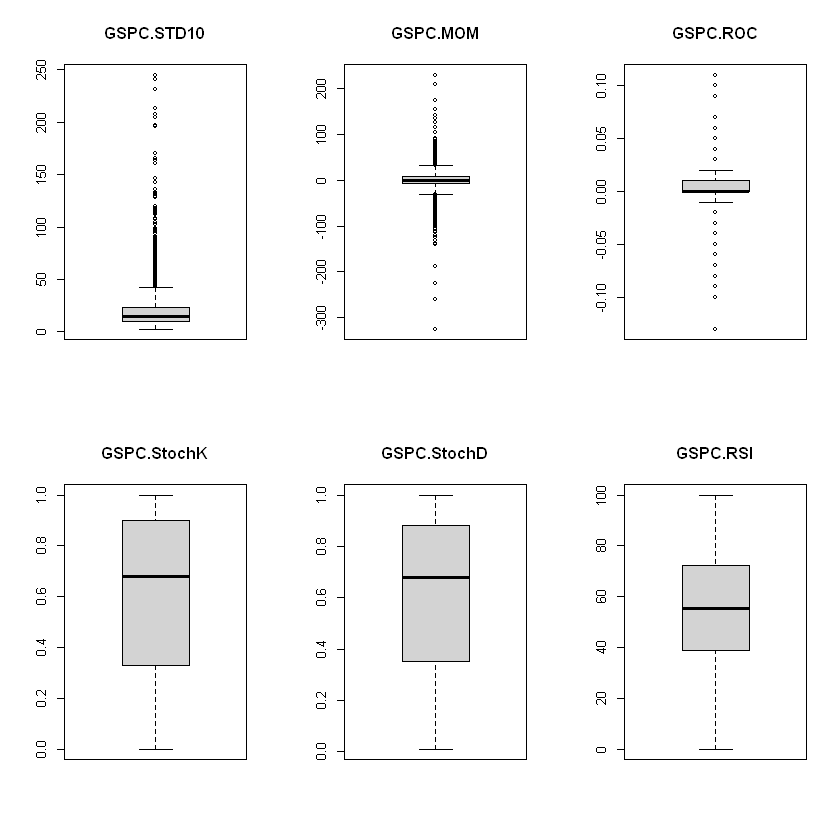

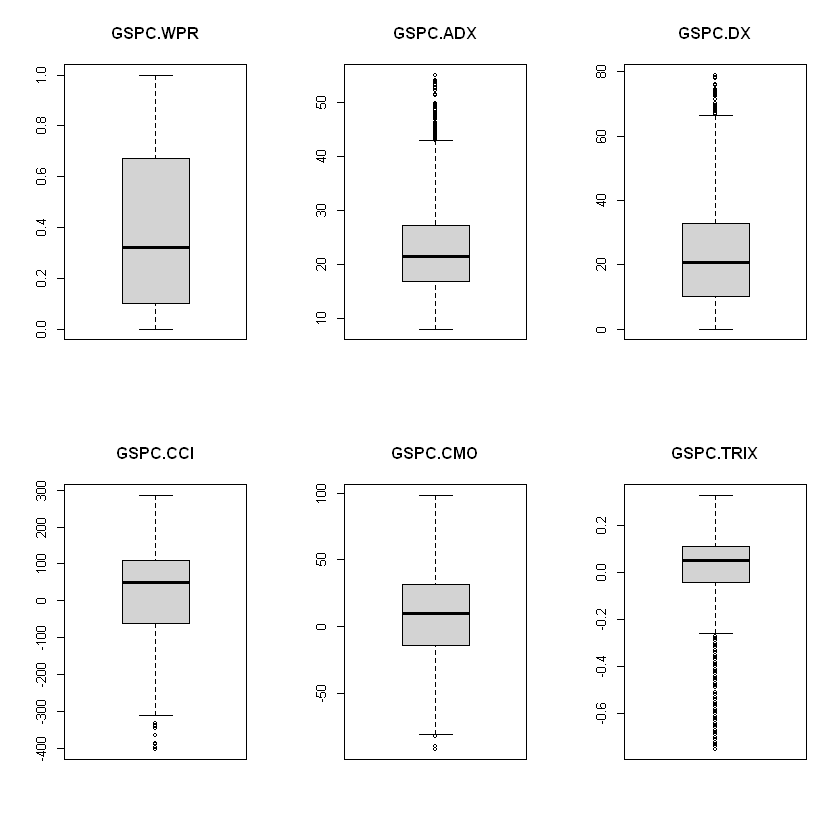

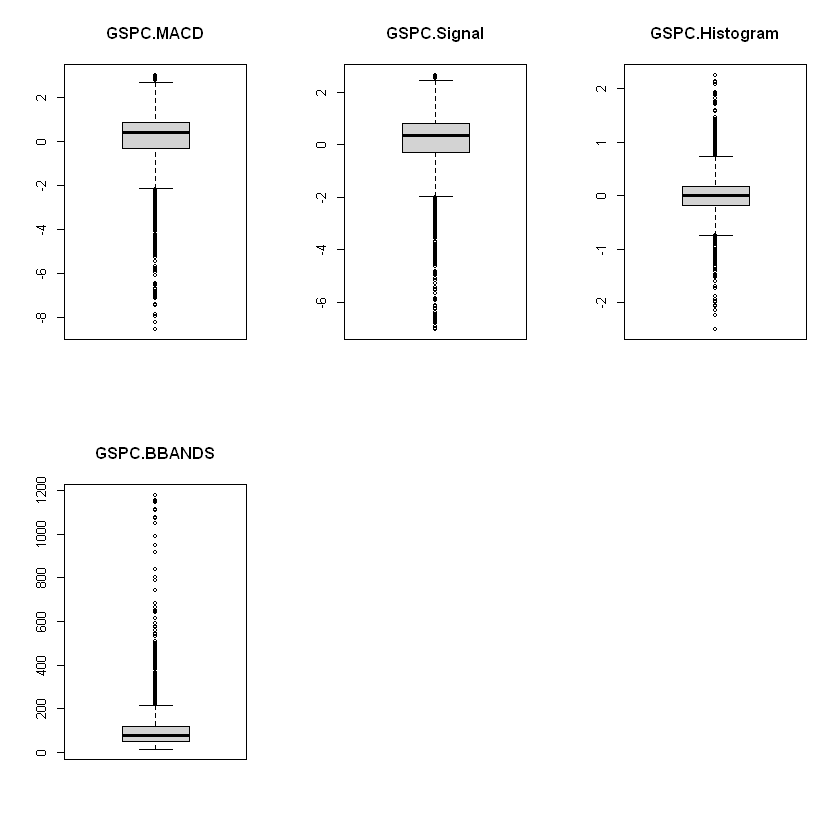

In [27]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    boxplot(GSPC.df3[,column], col = 'light grey', main = column, border = 'black', horizontal = FALSE)
}

## 4.4. Histogramas

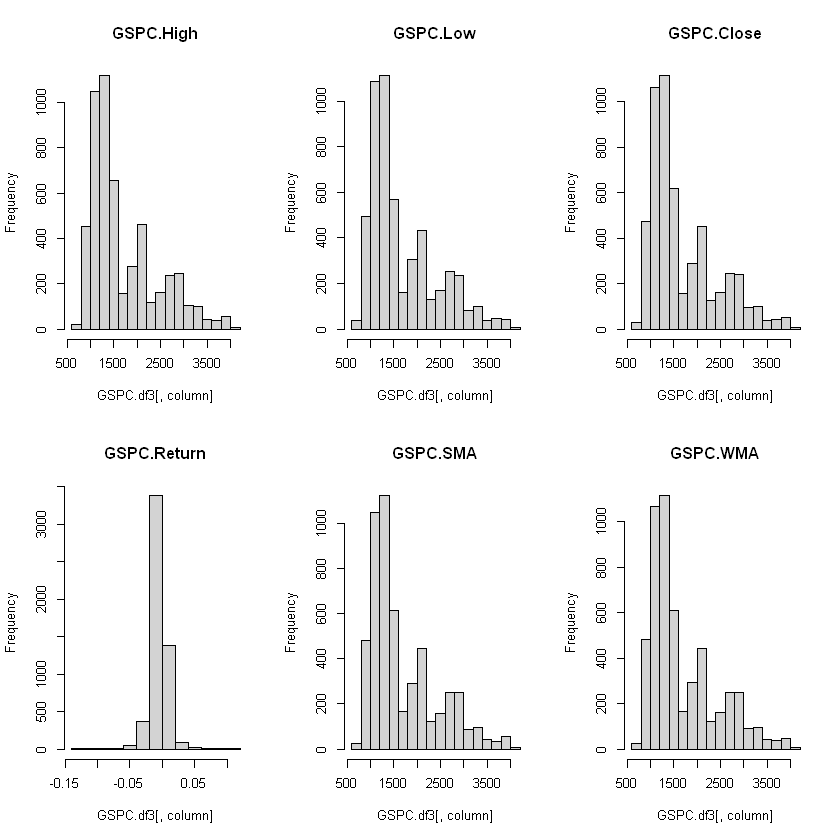

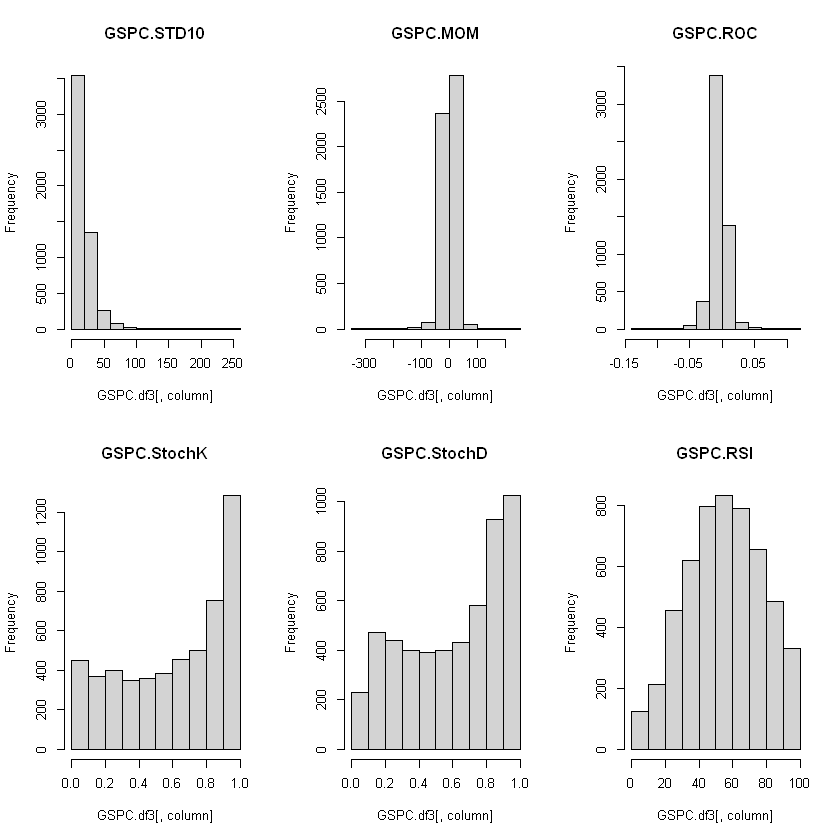

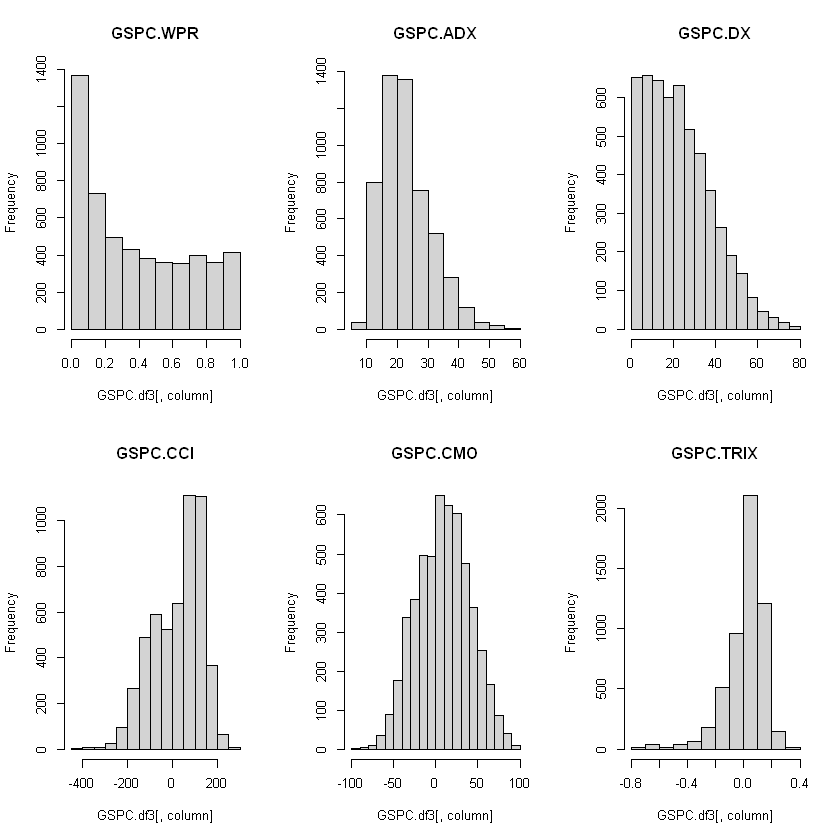

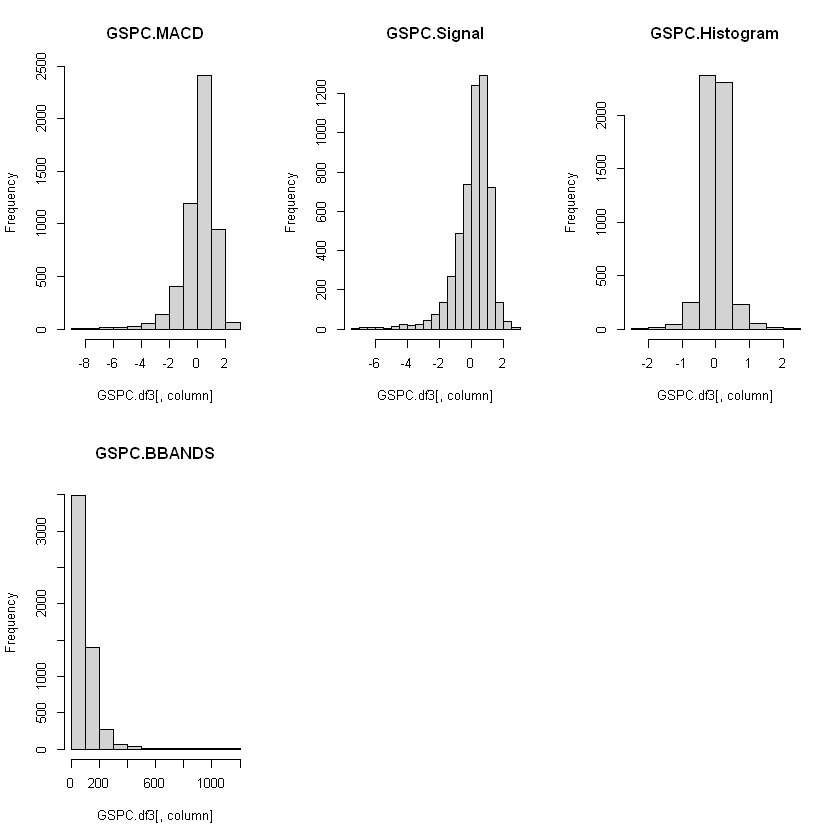

In [28]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    hist(GSPC.df3[,column], col = 'light grey', main = column, border = 'black')
}

## 4.5. Densidades

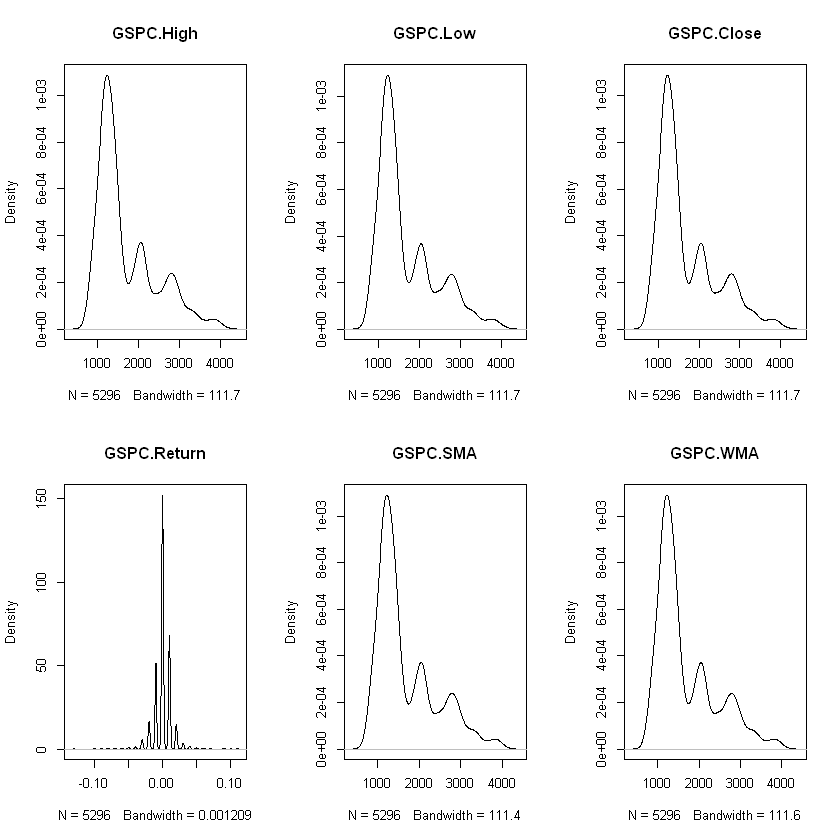

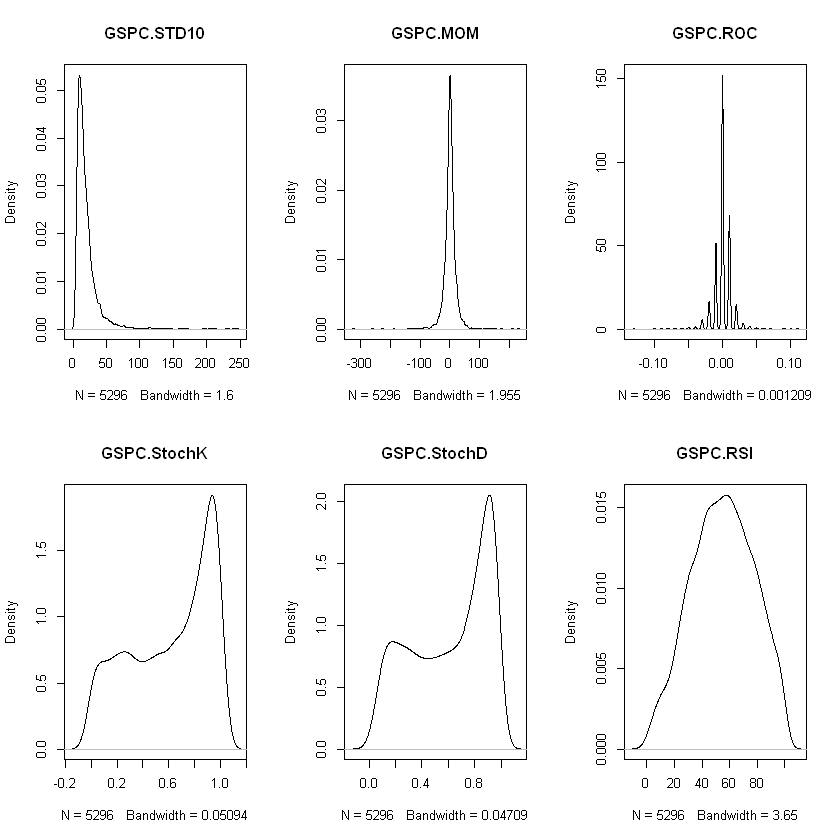

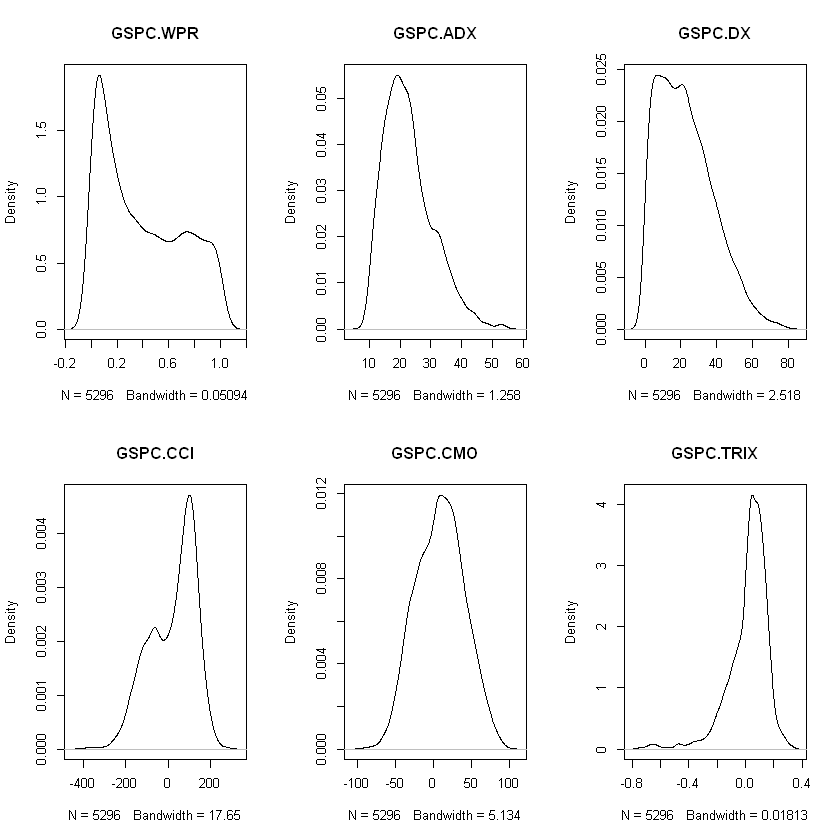

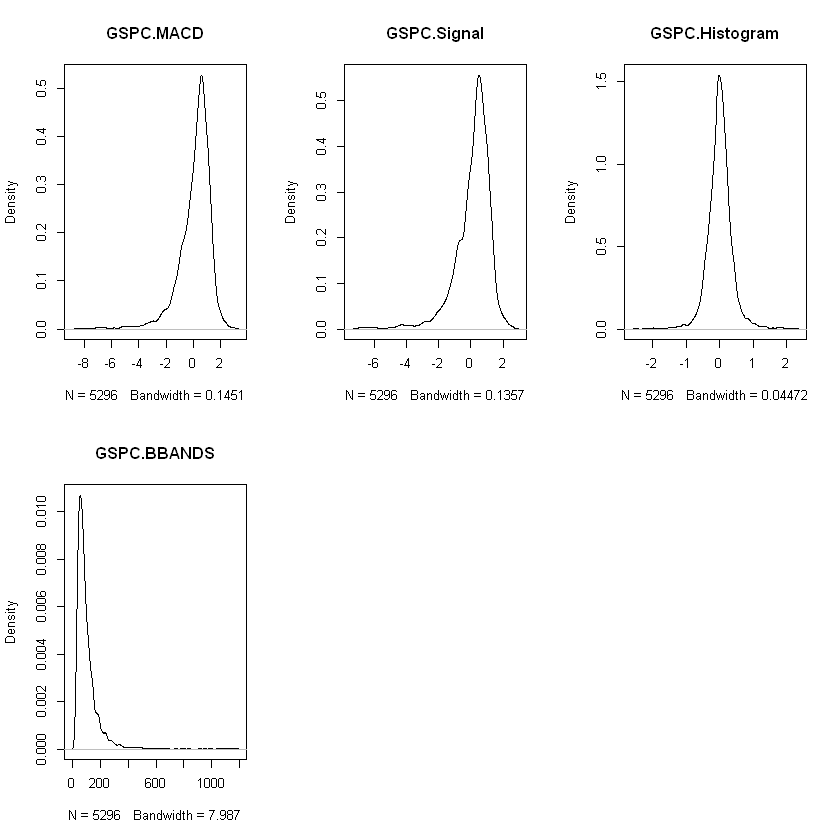

In [29]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    plot(density(GSPC.df3[,column]), main = column)
}

## 4.6. QQPlot

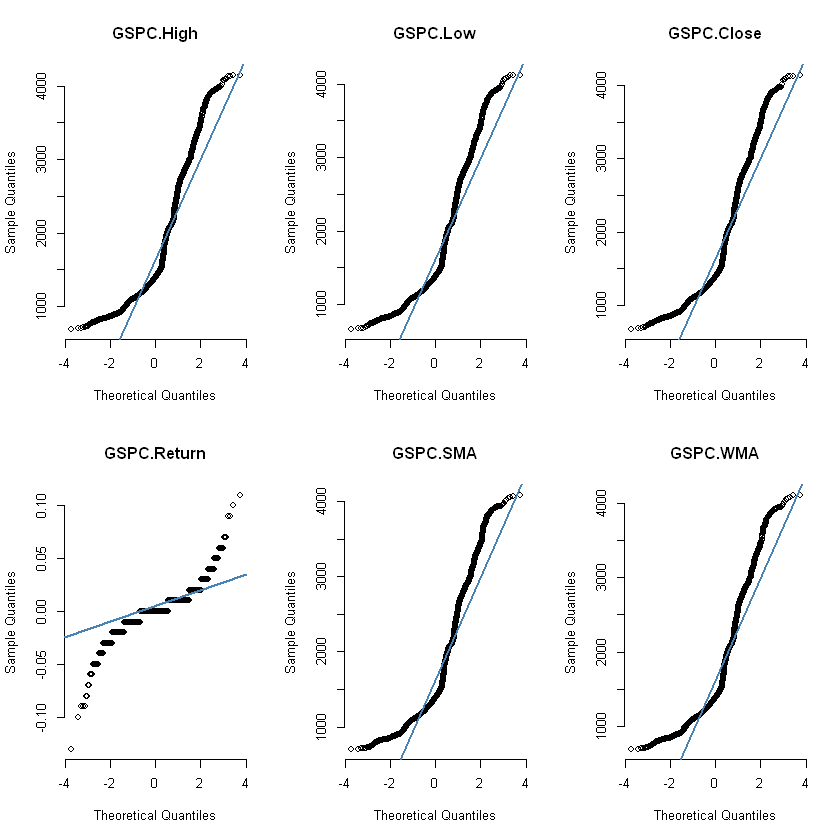

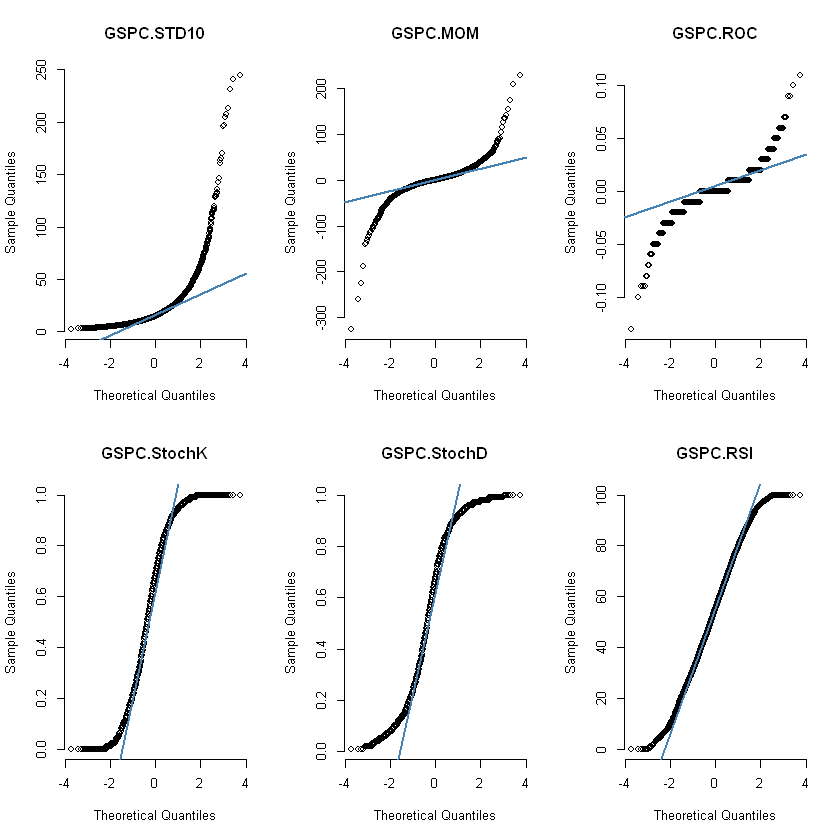

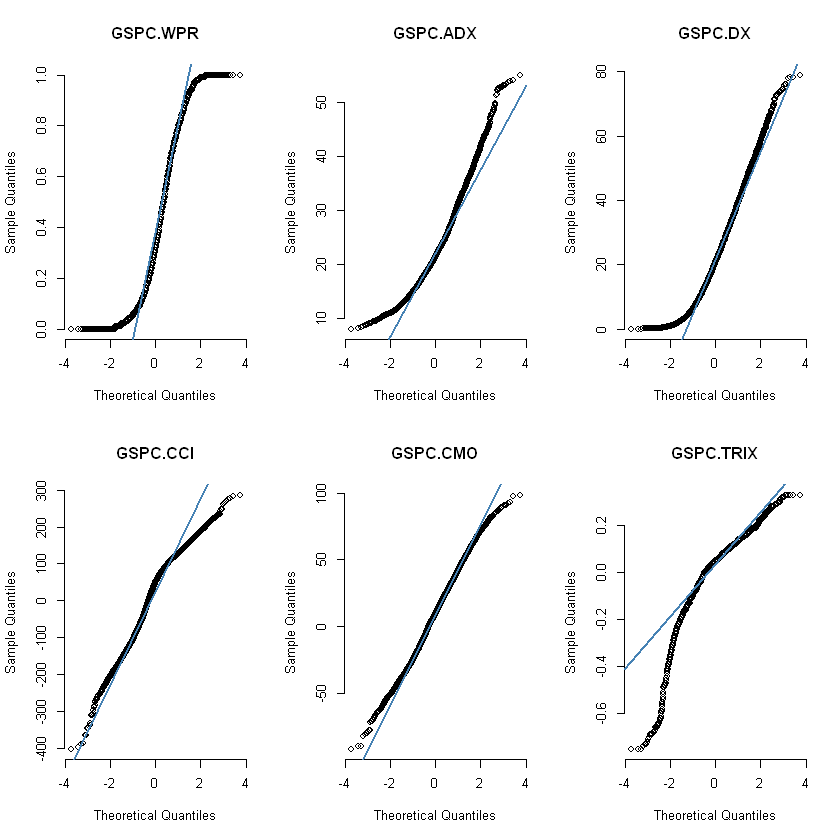

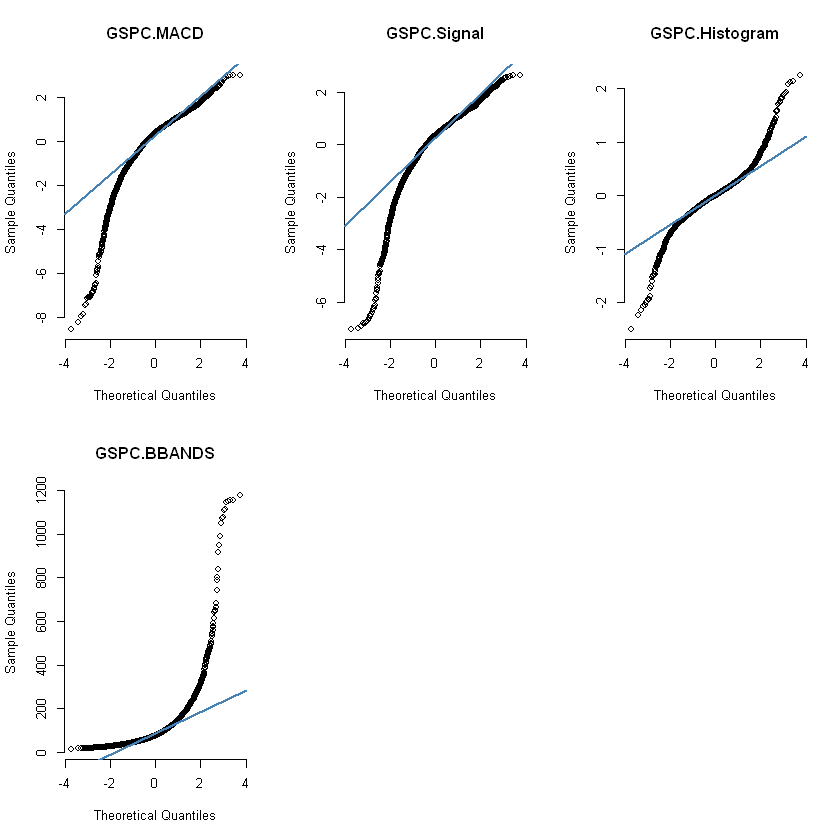

In [30]:
par(mfrow=c(2,3))

for (column in colnames(GSPC.df3)){
    qqnorm(GSPC.df3[,column], pch = 1, frame = FALSE, main = column)
    qqline(GSPC.df3[,column], col = "steelblue", lwd = 2)
}

## 4.6. Análise de correlação

In [31]:
# Package
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [32]:
# Cálculo das correlações
round(cor(GSPC.df3), digits = 2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
GSPC.High,1.00,1.00,1.00,0.02,1.00,1.00,0.39,0.04,0.02,0.17,...,-0.17,-0.07,-0.04,0.15,0.18,0.22,0.19,0.20,0.01,0.41
GSPC.Low,1.00,1.00,1.00,0.02,1.00,1.00,0.38,0.04,0.02,0.18,...,-0.18,-0.08,-0.04,0.16,0.18,0.23,0.20,0.21,0.02,0.40
GSPC.Close,1.00,1.00,1.00,0.03,1.00,1.00,0.38,0.05,0.03,0.18,...,-0.18,-0.08,-0.04,0.15,0.18,0.23,0.20,0.20,0.01,0.40
GSPC.Return,0.02,0.02,0.03,1.00,0.01,0.01,-0.04,0.88,1.00,0.38,...,-0.38,0.00,-0.10,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.SMA,1.00,1.00,1.00,0.01,1.00,1.00,0.40,0.03,0.01,0.15,...,-0.15,-0.07,-0.03,0.12,0.16,0.22,0.18,0.20,-0.02,0.41
GSPC.WMA,1.00,1.00,1.00,0.01,1.00,1.00,0.39,0.03,0.01,0.15,...,-0.15,-0.07,-0.03,0.13,0.17,0.23,0.19,0.20,-0.01,0.41
GSPC.STD10,0.39,0.38,0.38,-0.04,0.40,0.39,1.00,-0.04,-0.04,-0.11,...,0.11,0.25,0.23,-0.17,-0.21,-0.34,-0.42,-0.40,-0.14,0.85
GSPC.MOM,0.04,0.04,0.05,0.88,0.03,0.03,-0.04,1.00,0.88,0.37,...,-0.37,-0.01,-0.09,0.26,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.ROC,0.02,0.02,0.03,1.00,0.01,0.01,-0.04,0.88,1.00,0.38,...,-0.38,0.00,-0.10,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.StochK,0.17,0.18,0.18,0.38,0.15,0.15,-0.11,0.37,0.38,1.00,...,-1.00,-0.06,-0.16,0.91,0.81,0.16,0.47,0.28,0.67,-0.03


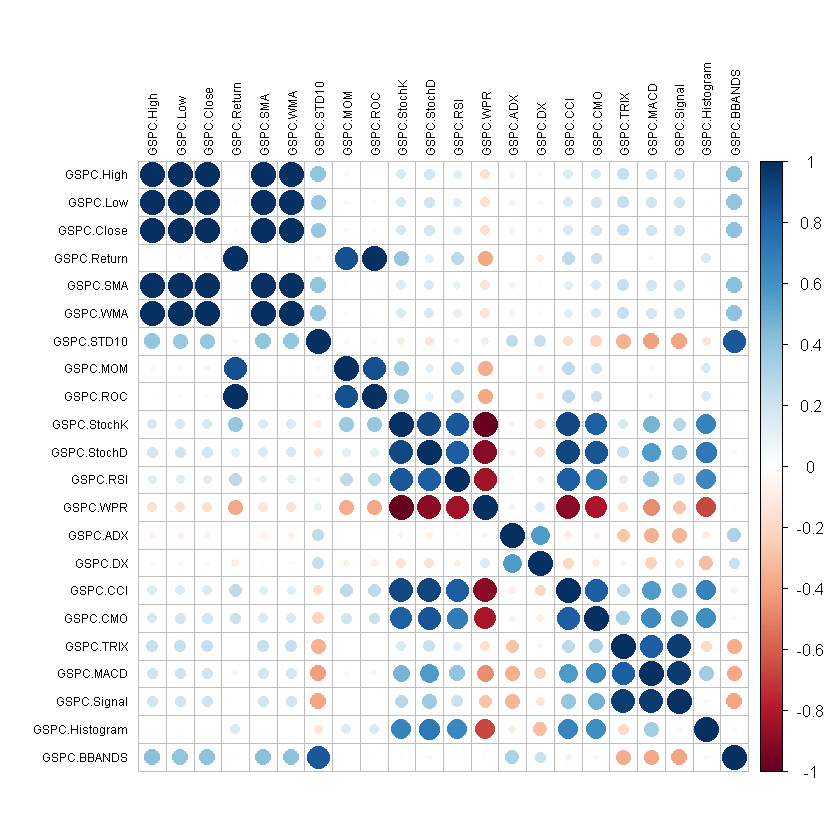

In [33]:
# Matriz de correlação
corrplot(cor(GSPC.df3), method = "circle", tl.col = "black", tl.cex = 0.6, tl.srt=90)

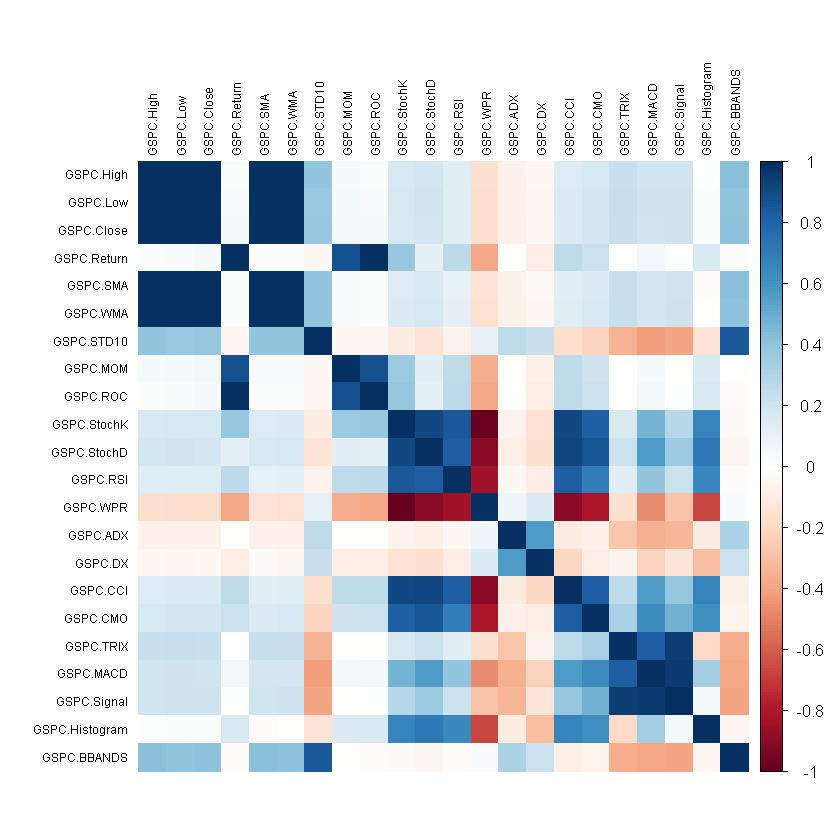

In [34]:
# Matriz de correlação
corrplot(cor(GSPC.df3), method = "color", tl.col = "black", tl.cex = 0.6, tl.srt=90)

# 5. Preprocessamento dos dados

## 5.1. Remoção dos *missing values*

A remoção dos dados ausentes foi realizada na seção anterior (análise exploratória de dados).

## 5.2. Tratamento dos outliers

In [35]:
# Função para substituição dos outliers pelos limietes do boxplot
outlier <- function(x){
    q1 = quantile(x, probs = .25, na.rm = T)
    q3 =  quantile(x, probs = .75, na.rm = T)
    iqr =  q3 - q1 
    li = q1 - 1.5*iqr
    ls = q3 + 1.5*iqr
    
    x[x < li] = li
    x[x > ls] = ls
    
    return (x)    
}

In [36]:
# Remoção dos outliers
GSPC.bp <- GSPC.df3
for (column in colnames(GSPC.df3)){
    GSPC.bp[,column] <- outlier(GSPC.df3[,column])
}

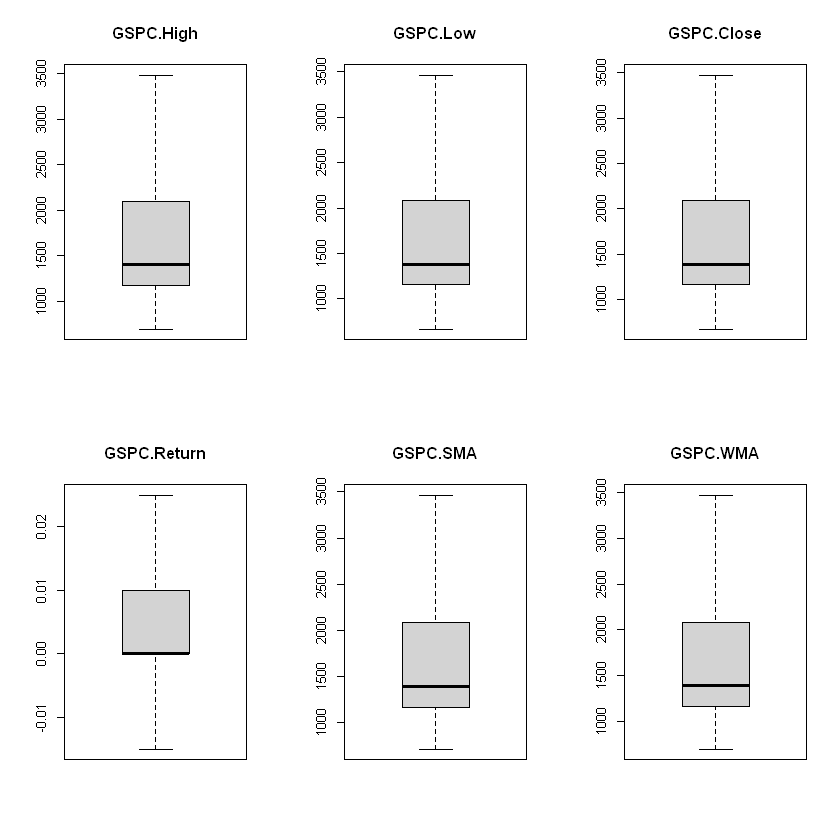

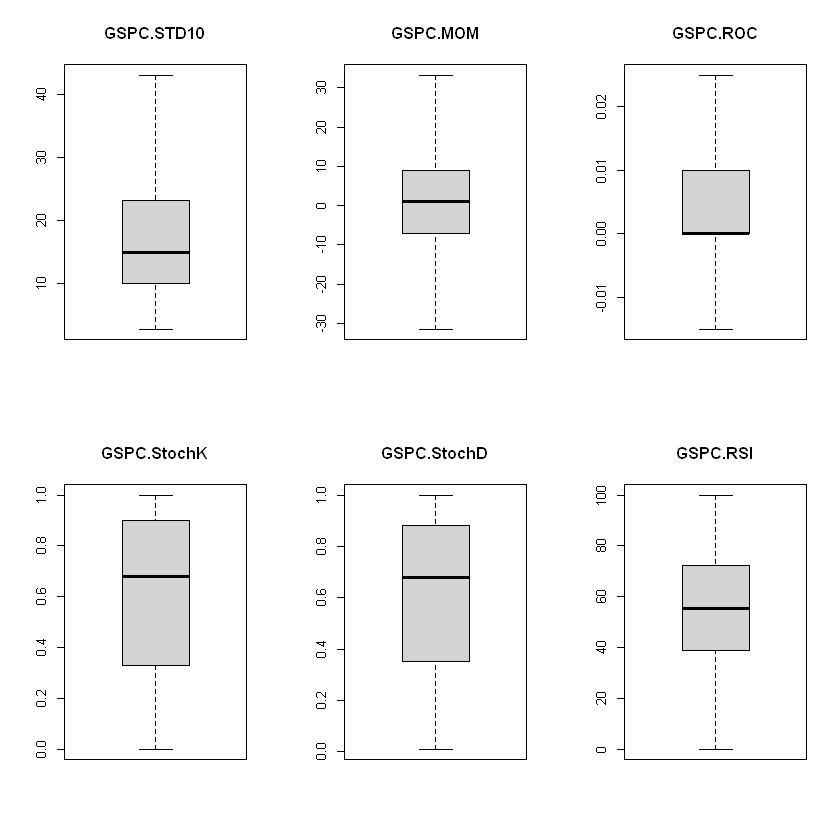

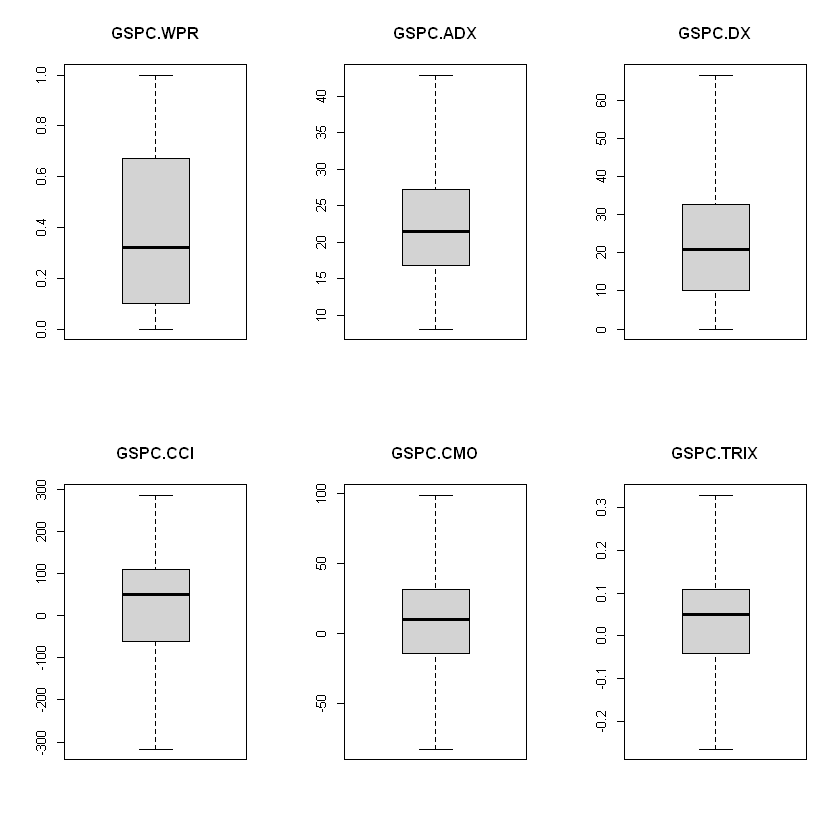

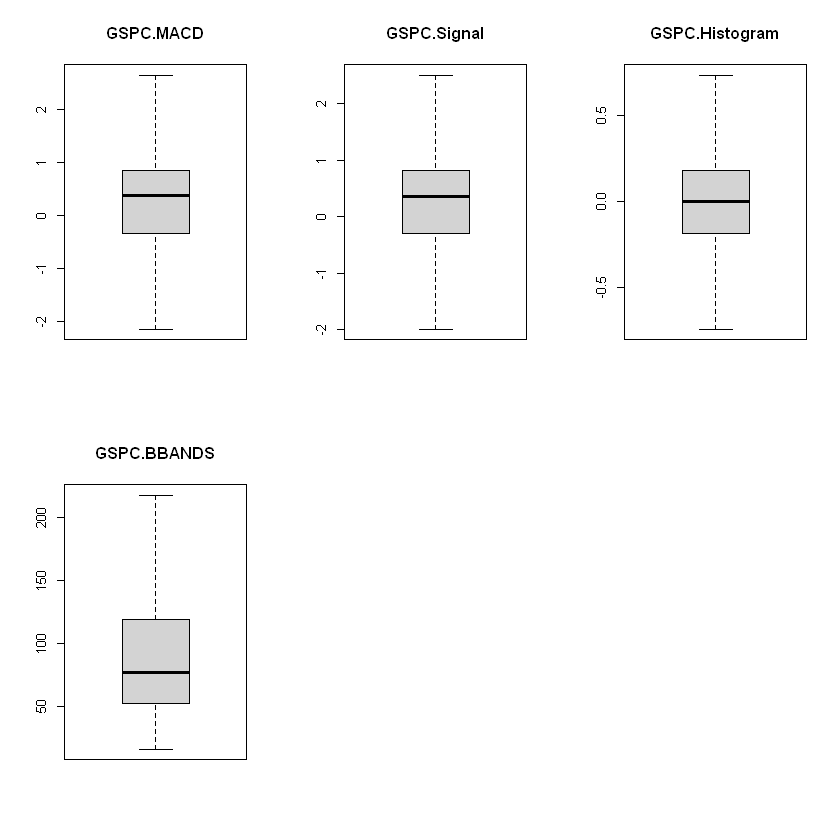

In [37]:
# Boxplot
par(mfrow=c(2, 3))

for (column in colnames(GSPC.bp)){
    boxplot(GSPC.bp[,column], col='light grey', main=column, border='black', horizontal=FALSE)
}

## 5.3. Normalização

**Normalização z-score**

In [38]:
# Função para normalização dos dados
normalize.zscore = function(x) {
    return ((x - mean(x)) / sd(x))
}

In [39]:
# Normalização z-score
GSPC.zscore <- GSPC.bp
for (column in colnames(GSPC.bp)){
    GSPC.zscore[,column] <- normalize.zscore(GSPC.bp[,column])
}

In [40]:
head(GSPC.zscore)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
59,-0.2188064,-0.2148310,-0.2214329,-0.08217814,-0.2962630,-0.2588267,2.3695103,-0.2990188229,-0.08217814,0.7925936,...,-0.7925936,0.4731199,1.5720027,0.9920701,1.6346607,0.2885589,2.254090,1.252630,2.3917836,2.368402
60,-0.2291535,-0.2311024,-0.2444458,-1.15944405,-0.2749835,-0.2491301,2.3500931,-1.1505754037,-1.15944405,0.5064170,...,-0.5064170,0.5910166,1.0651578,0.7264591,1.2946875,0.5425899,2.274663,1.482729,2.3917836,2.368402
61,-0.2375650,-0.2448980,-0.2433186,-0.08217814,-0.2583151,-0.2430805,0.9387980,-0.0006681932,-0.08217814,0.5064170,...,-0.5064170,0.6415438,0.6471081,0.5764832,1.0768774,0.7119440,2.264376,1.668999,2.2131968,2.368402
62,-0.2433576,-0.2775553,-0.2727089,-1.15944405,-0.2541050,-0.2454117,0.6423313,-1.4543629469,-1.15944405,0.1884429,...,-0.1884429,0.5586274,-0.2609349,0.3399650,0.8347609,0.8812980,2.110076,1.789527,1.3689682,2.368402
63,-0.2398990,-0.2636022,-0.2575003,0.99508777,-0.2492076,-0.2457406,0.3316569,0.6701110130,0.99508777,0.3474299,...,-0.3474299,0.4912579,-0.1980654,0.3668484,1.1062344,0.9659750,2.017495,1.855270,0.8819133,2.368402
64,-0.2578607,-0.2599101,-0.2469568,-0.08217814,-0.2421479,-0.2450398,-0.3834625,0.4478771726,-0.08217814,0.4746195,...,-0.4746195,0.4277750,-0.1980654,0.3100435,1.6179303,1.1353290,1.966061,1.910055,0.5572101,2.368402


**Normalização min-max**

In [41]:
# Função para normalização dos dados
normalize.minmax = function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [42]:
# Normalização - dados sem outliers
GSPC.minmax <- GSPC.bp
for (column in colnames(GSPC.bp)){
    GSPC.minmax[,column] <- normalize.minmax(GSPC.bp[,column])
}

In [43]:
head(GSPC.minmax)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
59,0.3010505,0.3043239,0.3027750,0.375,0.2764395,0.2874437,1.0000000,0.4305040,0.375,0.86,...,0.14,0.5240765,0.7046477,0.7415028,0.7921627,0.5462185,0.9437500,0.7385857,1.0000000,1
60,0.2984430,0.3002611,0.2970113,0.125,0.2818271,0.2898919,0.9949087,0.2367811,0.125,0.77,...,0.23,0.5502372,0.5874063,0.6936729,0.7327727,0.5966387,0.9479167,0.7853563,1.0000000,1
61,0.2963232,0.2968165,0.2972936,0.375,0.2860473,0.2914193,0.6248603,0.4983766,0.375,0.77,...,0.23,0.5614489,0.4907046,0.6666660,0.6947234,0.6302521,0.9458333,0.8232183,0.9628378,1
62,0.2948635,0.2886623,0.2899327,0.125,0.2871132,0.2908307,0.5471253,0.1676716,0.125,0.67,...,0.33,0.5430502,0.2806597,0.6240750,0.6524281,0.6638655,0.9145833,0.8477171,0.7871622,1
63,0.2957351,0.2921463,0.2937418,0.625,0.2883532,0.2907476,0.4656650,0.6509740,0.625,0.72,...,0.28,0.5281012,0.2952024,0.6289160,0.6998518,0.6806723,0.8958333,0.8610802,0.6858108,1
64,0.2912086,0.2930682,0.2963824,0.375,0.2901406,0.2909246,0.2781572,0.6004174,0.375,0.76,...,0.24,0.5140147,0.2952024,0.6186868,0.7892400,0.7142857,0.8854167,0.8722160,0.6182432,1


## 5.4. Seleção de atributos

In [44]:
Direction.df <- GSPC.df2[, (names(GSPC.df2) %in% v.direction)]

In [45]:
head(Direction.df)

,GSPC.Direction,GSPC.Trend
59,1,up
60,1,up
61,1,up
62,1,up
63,1,up
64,1,up


### 5.4.1. Classificação e seleção de atributos com base no algoritmo de *random forest*

In [46]:
# Package
library(Boruta)

Warning message:
"package 'Boruta' was built under R version 3.6.3"

**Dados z-score**

In [47]:
# Objeto de armazenamento dos resultados
set.seed(123)
GSPCboruta.zscore.output <- Boruta(Direction.df$GSPC.Trend ~., data = GSPC.zscore, doTrace = 0)
names(GSPCboruta.zscore.output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [48]:
# Obtenção das variáveis de significância
GSPCboruta.zscore.signif <- getSelectedAttributes(GSPCboruta.zscore.output, withTentative = TRUE)
print(GSPCboruta.zscore.signif)

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.Return"   
 [5] "GSPC.SMA"       "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"      
 [9] "GSPC.ROC"       "GSPC.StochK"    "GSPC.StochD"    "GSPC.RSI"      
[13] "GSPC.WPR"       "GSPC.ADX"       "GSPC.DX"        "GSPC.CCI"      
[17] "GSPC.CMO"       "GSPC.TRIX"      "GSPC.MACD"      "GSPC.Signal"   
[21] "GSPC.Histogram" "GSPC.BBANDS"   


In [49]:
# Correção preliminar
GSPCboruta.zscore.roughfixmod <- TentativeRoughFix(GSPCboruta.zscore.output)
GSPCboruta.zscore.signif2 <- getSelectedAttributes(GSPCboruta.zscore.roughfixmod)
print(GSPCboruta.zscore.signif2)

Warning message in TentativeRoughFix(GSPCboruta.zscore.output):
"There are no Tentative attributes! Returning original object."

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.Return"   
 [5] "GSPC.SMA"       "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"      
 [9] "GSPC.ROC"       "GSPC.StochK"    "GSPC.StochD"    "GSPC.RSI"      
[13] "GSPC.WPR"       "GSPC.ADX"       "GSPC.DX"        "GSPC.CCI"      
[17] "GSPC.CMO"       "GSPC.TRIX"      "GSPC.MACD"      "GSPC.Signal"   
[21] "GSPC.Histogram" "GSPC.BBANDS"   


In [50]:
# Score de importância das variáveis
GSPCboruta.zscore.imp <- attStats(GSPCboruta.zscore.roughfixmod)
GSPCboruta.zscore.imp2 <- GSPCboruta.zscore.imp[GSPCboruta.zscore.imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(GSPCboruta.zscore.imp2[order(-GSPCboruta.zscore.imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
GSPC.MACD,46.96340,Confirmed
GSPC.CCI,41.40090,Confirmed
GSPC.Signal,34.26168,Confirmed
GSPC.CMO,29.42019,Confirmed
GSPC.Histogram,24.93660,Confirmed
GSPC.TRIX,21.85971,Confirmed


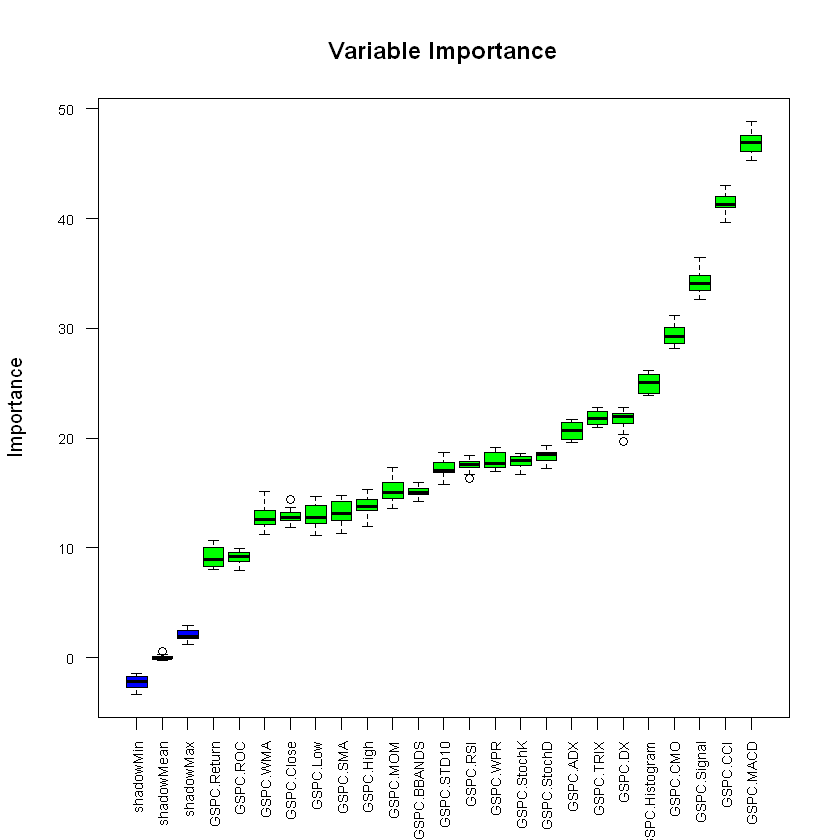

In [51]:
# Análise Gráfica
plot(GSPCboruta.zscore.output, cex.axis = .7, las = 2, xlab = "", main = "Variable Importance")

Variável `GSPC.ADX`: estado de atenção

**Dados minmax**

In [52]:
# Objeto de armazenamento dos resultados
set.seed(123)
GSPCboruta.minmax.output <- Boruta(Direction.df$GSPC.Trend ~., data = GSPC.minmax, doTrace = 0)
names(GSPCboruta.minmax.output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [53]:
# Obtenção das variáveis de significância
GSPCboruta.minmax.signif <- getSelectedAttributes(GSPCboruta.minmax.output, withTentative = TRUE)
print(GSPCboruta.minmax.signif)

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.Return"   
 [5] "GSPC.SMA"       "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"      
 [9] "GSPC.ROC"       "GSPC.StochK"    "GSPC.StochD"    "GSPC.RSI"      
[13] "GSPC.WPR"       "GSPC.ADX"       "GSPC.DX"        "GSPC.CCI"      
[17] "GSPC.CMO"       "GSPC.TRIX"      "GSPC.MACD"      "GSPC.Signal"   
[21] "GSPC.Histogram" "GSPC.BBANDS"   


In [54]:
# Correção preliminar
GSPCboruta.minmax.roughfixmod <- TentativeRoughFix(GSPCboruta.minmax.output)
GSPCboruta.minmax.signif2 <- getSelectedAttributes(GSPCboruta.minmax.roughfixmod)
print(GSPCboruta.minmax.signif2)

Warning message in TentativeRoughFix(GSPCboruta.minmax.output):
"There are no Tentative attributes! Returning original object."

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.Return"   
 [5] "GSPC.SMA"       "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"      
 [9] "GSPC.ROC"       "GSPC.StochK"    "GSPC.StochD"    "GSPC.RSI"      
[13] "GSPC.WPR"       "GSPC.ADX"       "GSPC.DX"        "GSPC.CCI"      
[17] "GSPC.CMO"       "GSPC.TRIX"      "GSPC.MACD"      "GSPC.Signal"   
[21] "GSPC.Histogram" "GSPC.BBANDS"   


In [55]:
# Score de importância das variáveis
GSPCboruta.minmax.imp <- attStats(GSPCboruta.minmax.roughfixmod)
GSPCboruta.minmax.imp2 <- GSPCboruta.zscore.imp[GSPCboruta.minmax.imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(GSPCboruta.minmax.imp2[order(-GSPCboruta.minmax.imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
GSPC.MACD,46.96340,Confirmed
GSPC.CCI,41.40090,Confirmed
GSPC.Signal,34.26168,Confirmed
GSPC.CMO,29.42019,Confirmed
GSPC.Histogram,24.93660,Confirmed
GSPC.TRIX,21.85971,Confirmed


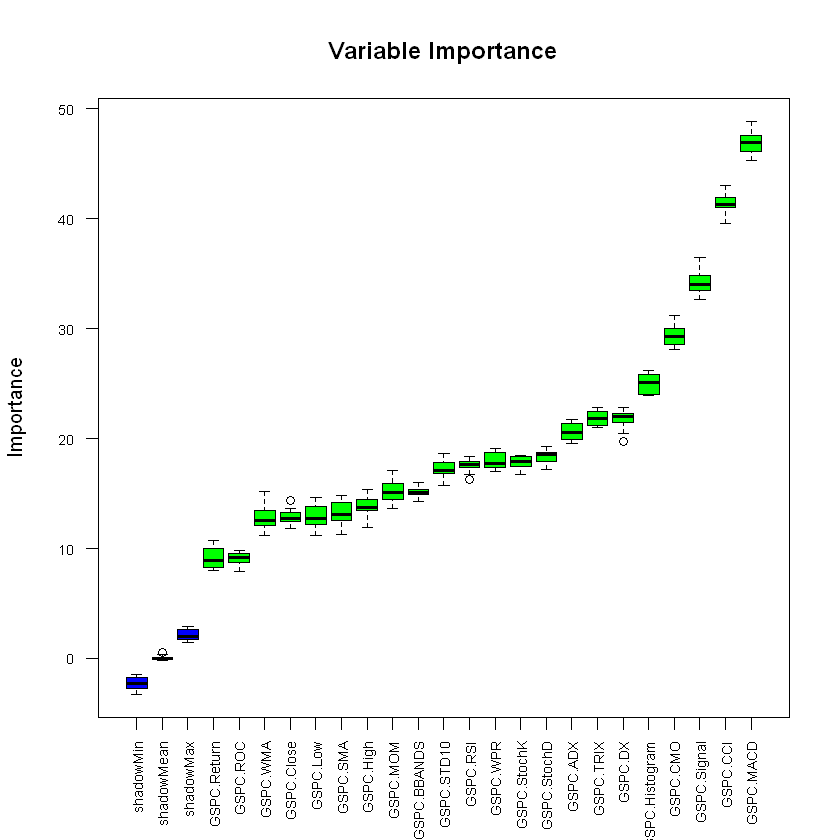

In [56]:
# Análise Gráfica
plot(GSPCboruta.minmax.output, cex.axis = .7, las = 2, xlab = "", main = "Variable Importance")

Todas as *features* foram consideradas.

### 5.4.2. Classificação e seleção de atributos com base no algoritmo *Recursive Feature Elimination* (RFE)

In [57]:
# Package
library(caret)
library(e1071)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'e1071' was built under R version 3.6.3"

In [58]:
# Definição do controle por meio de uma função de seleção random forest
control <- rfeControl(functions = rfFuncs, method = "cv", number = 10)

**Dados z-score**

In [59]:
GSPCrfe.zscore.output <- rfe(Direction.df$GSPC.Trend~., GSPC.zscore, rfeControl = control)

In [60]:
# Resultado da seleção
print(GSPCrfe.zscore.output)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         4   0.8969 0.7782    0.01132 0.02446         
         8   0.9114 0.8095    0.01123 0.02476         
        16   0.9150 0.8173    0.01246 0.02767         
        22   0.9156 0.8187    0.01415 0.03078        *

The top 5 variables (out of 22):
   GSPC.MACD, GSPC.CCI, GSPC.Signal, GSPC.CMO, GSPC.Histogram



In [61]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(GSPCrfe.zscore.output)

[1] "GSPC.MACD"      "GSPC.CCI"       "GSPC.Signal"    "GSPC.CMO"      
 [5] "GSPC.Histogram" "GSPC.TRIX"      "GSPC.ADX"       "GSPC.STD10"    
 [9] "GSPC.DX"        "GSPC.SMA"       "GSPC.BBANDS"    "GSPC.High"     
[13] "GSPC.WMA"       "GSPC.StochD"    "GSPC.Close"     "GSPC.StochK"   
[17] "GSPC.WPR"       "GSPC.Low"       "GSPC.RSI"       "GSPC.MOM"      
[21] "GSPC.Return"    "GSPC.ROC"

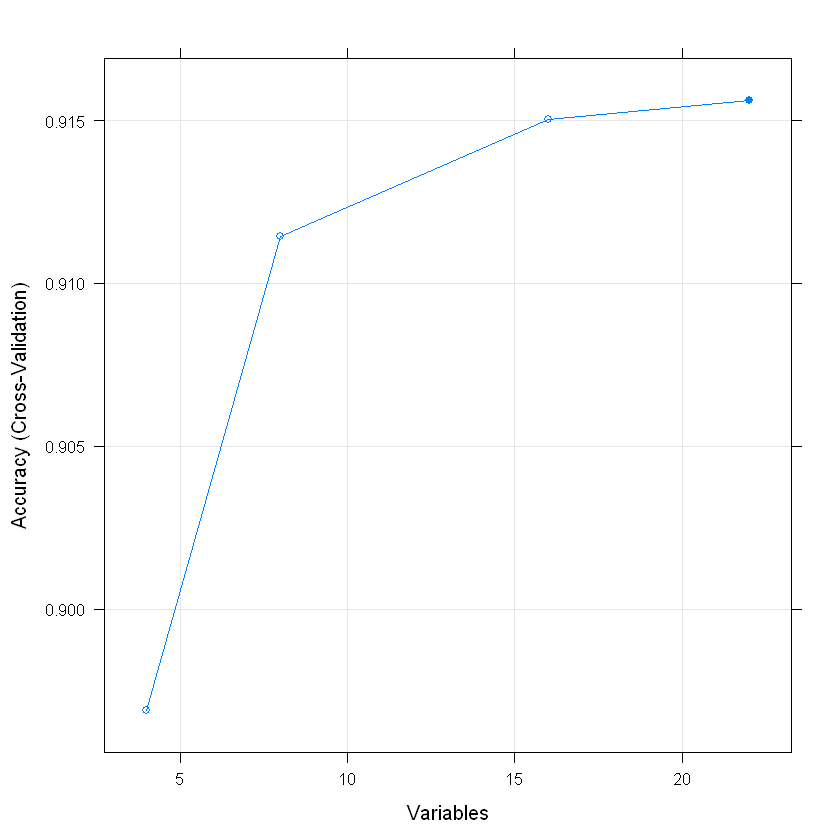

In [62]:
plot(GSPCrfe.zscore.output, type=c("g", "o"))

Todas as *features* foram consideradas.

**Dados minmax**

In [63]:
GSPCrfe.minmax.output <- rfe(Direction.df$GSPC.Trend~., GSPC.minmax, rfeControl = control)

In [64]:
# Resultado da seleção
print(GSPCrfe.minmax.output)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         4   0.8986 0.7815    0.01111 0.02382         
         8   0.9120 0.8110    0.01534 0.03233         
        16   0.9152 0.8180    0.01562 0.03270         
        22   0.9171 0.8221    0.01424 0.02981        *

The top 5 variables (out of 22):
   GSPC.MACD, GSPC.CCI, GSPC.Signal, GSPC.CMO, GSPC.Histogram



In [65]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(GSPCrfe.minmax.output)

[1] "GSPC.MACD"      "GSPC.CCI"       "GSPC.Signal"    "GSPC.CMO"      
 [5] "GSPC.Histogram" "GSPC.TRIX"      "GSPC.ADX"       "GSPC.STD10"    
 [9] "GSPC.DX"        "GSPC.High"      "GSPC.WPR"       "GSPC.SMA"      
[13] "GSPC.StochD"    "GSPC.BBANDS"    "GSPC.StochK"    "GSPC.Close"    
[17] "GSPC.Low"       "GSPC.WMA"       "GSPC.RSI"       "GSPC.MOM"      
[21] "GSPC.Return"    "GSPC.ROC"

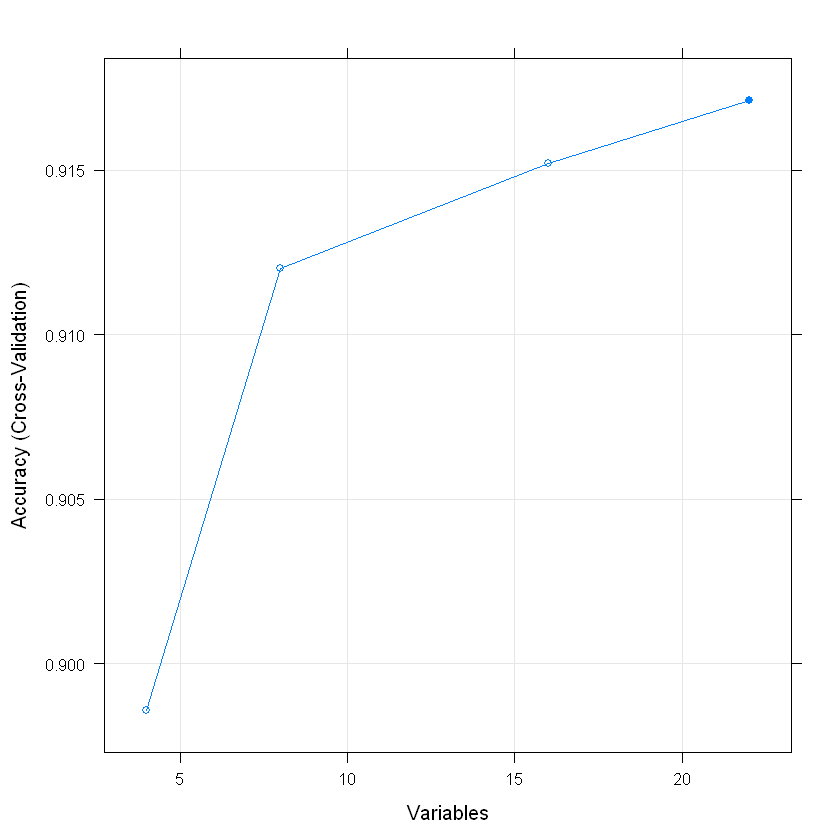

In [66]:
plot(GSPCrfe.minmax.output, type=c("g", "o"))

Todas as *features* foram consideradas.

### 5.4.3. Seleção de atributos utilizando Análise de Componentes Principais (PCA)

**Dados z-score**

In [67]:
# Magnitude completa (variância completa)
GSPC.zscore.pca <- prcomp(x = GSPC.zscore, center = TRUE, scale. = TRUE)
summary(GSPC.zscore.pca)

# PCA com maior proporção de variância: PCA1 (35.33%)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     2.7427 2.2805 1.8064 1.4988 1.2294 0.81328 0.66042
Proportion of Variance 0.3419 0.2364 0.1483 0.1021 0.0687 0.03006 0.01983
Cumulative Proportion  0.3419 0.5783 0.7267 0.8288 0.8975 0.92753 0.94735
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58503 0.47125 0.42133 0.34609 0.34330 0.30467 0.20796
Proportion of Variance 0.01556 0.01009 0.00807 0.00544 0.00536 0.00422 0.00197
Cumulative Proportion  0.96291 0.97300 0.98107 0.98652 0.99187 0.99609 0.99806
                          PC15    PC16    PC17    PC18     PC19     PC20
Standard deviation     0.19098 0.07404 0.02459 0.01025 0.006906 0.003912
Proportion of Variance 0.00166 0.00025 0.00003 0.00000 0.000000 0.000000
Cumulative Proportion  0.99972 0.99996 0.99999 1.00000 1.000000 1.000000
                           PC21      PC22
Standard deviation     1.28e

A função `prcomp` fornece 4 outputs:

* Sdev: definição do desvio padrão dos pontos projetados sobre os PCAs (diminui do PCA1 até o PCA18)

* Rotation: definição dos eixos dos componentes principais. `Rotation` é a matriz *rotation*, que fornece os pesos utilizados para projetar os pontos originais para as 2 novas direções.

* Center: média das features de input no espaço de features originais (sem qualquer transformação).

* Scale: desvio padrão das features de input no espaço de features originais (sem qualquer transformação).

In [68]:
print('Sdev')
round(GSPC.zscore.pca$sdev, 4)

[1] "Sdev"


[1] 2.7427 2.2805 1.8064 1.4988 1.2294 0.8133 0.6604 0.5850 0.4713 0.4213
[11] 0.3461 0.3433 0.3047 0.2080 0.1910 0.0740 0.0246 0.0103 0.0069 0.0039
[21] 0.0000 0.0000

In [69]:
print('Rotation')
round(GSPC.zscore.pca$rotation, 4)

[1] "Rotation"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
GSPC.High,0.1861,0.3709,-0.0280,-0.0350,-0.0576,0.1393,0.0044,-0.0157,0.0374,-0.0090,...,0.0092,-0.0074,0.0005,-0.0033,-0.1840,-0.7565,-0.4411,-0.0141,0.0000,0.0000
GSPC.Low,0.1892,0.3680,-0.0315,-0.0367,-0.0593,0.1465,0.0025,-0.0170,0.0398,-0.0068,...,0.0084,-0.0085,0.0118,0.0105,-0.5270,0.6104,-0.3768,0.0817,0.0000,0.0000
GSPC.Close,0.1890,0.3685,-0.0260,-0.0398,-0.0581,0.1432,0.0037,-0.0170,0.0382,-0.0070,...,0.0033,-0.0063,0.0035,0.0067,-0.3392,-0.1300,0.8133,0.0832,0.0000,0.0000
GSPC.Return,0.1206,-0.0761,0.3764,-0.4082,0.0249,-0.0331,0.0364,-0.0689,0.0861,-0.0211,...,0.0658,0.0141,-0.0045,0.0033,-0.0027,0.0019,-0.0008,0.0002,-0.0950,-0.7007
GSPC.SMA,0.1790,0.3755,-0.0320,-0.0410,-0.0525,0.1429,0.0028,-0.0258,0.0254,-0.0128,...,0.0017,-0.0110,-0.0334,-0.0149,0.6294,0.1155,-0.0281,0.6226,0.0000,0.0000
GSPC.WMA,0.1819,0.3736,-0.0322,-0.0386,-0.0543,0.1421,0.0030,-0.0248,0.0337,-0.0104,...,-0.0001,-0.0063,-0.0231,-0.0022,0.4180,0.1573,0.0331,-0.7736,0.0000,0.0000
GSPC.STD10,-0.0086,0.2714,0.2524,0.1779,0.0529,-0.5844,-0.2084,0.3036,0.1824,-0.4436,...,-0.0071,-0.0044,-0.0090,-0.0042,-0.0021,0.0046,0.0007,0.0002,0.0000,0.0000
GSPC.MOM,0.1405,-0.0615,0.3513,-0.3944,0.0197,0.0066,-0.0024,-0.0082,-0.0004,0.0477,...,-0.0709,0.1982,-0.0412,-0.0038,0.0097,-0.0018,-0.0065,-0.0013,0.0000,0.0000
GSPC.ROC,0.1206,-0.0761,0.3764,-0.4082,0.0249,-0.0331,0.0364,-0.0689,0.0861,-0.0211,...,0.0658,0.0141,-0.0045,0.0033,-0.0027,0.0019,-0.0008,0.0002,0.0950,0.7007
GSPC.StochK,0.3225,-0.1397,0.1155,0.0961,0.0063,0.0658,-0.0906,0.1132,-0.3001,-0.1784,...,-0.3043,-0.3066,0.0245,0.0023,0.0010,-0.0005,-0.0012,-0.0014,-0.7007,0.0950


In [70]:
print('Center')
round(GSPC.zscore.pca$center, 4)

[1] "Center"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
             0              0              0              0              0 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
             0              0              0              0              0 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
             0              0              0              0              0 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
             0              0              0              0              0 
GSPC.Histogram    GSPC.BBANDS 
             0              0

In [71]:
print('Scale')
round(GSPC.zscore.pca$scale, 4)

[1] "Scale"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
             1              1              1              1              1 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
             1              1              1              1              1 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
             1              1              1              1              1 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
             1              1              1              1              1 
GSPC.Histogram    GSPC.BBANDS 
             1              1

In [72]:
# scores para as dimensões
head(round(GSPC.zscore.pca$x, 4))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
59,3.1237,-0.4960,0.5162,2.4331,2.2443,-3.2661,-0.1868,-0.8833,1.3274,0.0900,...,0.0380,-0.3839,0.0240,0.2229,-0.0333,0.0043,-0.0004,-0.0028,0,0
60,2.2341,-0.0586,-0.9206,3.1999,1.9744,-3.4335,0.3356,-0.6637,1.1990,-0.1671,...,-0.1270,-0.4794,0.2016,0.1324,-0.0022,0.0080,-0.0009,0.0003,0,0
61,2.6392,-0.6513,-0.1983,1.4080,1.8348,-2.7723,0.8407,-0.7812,1.1587,0.7238,...,-0.2057,-0.3073,0.1027,0.0413,0.0273,0.0057,-0.0019,0.0032,0,0
62,1.2260,-0.0659,-2.0508,1.9678,1.2682,-2.8207,1.6121,-0.6606,0.1007,0.1933,...,-0.1577,-0.4374,0.1013,0.0171,0.0231,-0.0087,0.0007,-0.0014,0,0
63,2.1488,-0.6036,0.1876,-0.8083,1.5674,-2.7160,1.6422,-0.9710,0.0010,0.4432,...,-0.0402,-0.1018,-0.0685,-0.0170,0.0125,-0.0026,-0.0116,-0.0008,0,0
64,1.8271,-0.5655,-1.0652,-0.1966,1.6017,-2.2828,1.9046,-1.4325,-0.9239,0.3496,...,-0.2506,-0.1883,0.0854,-0.0016,0.0076,0.0034,0.0058,0.0011,0,0


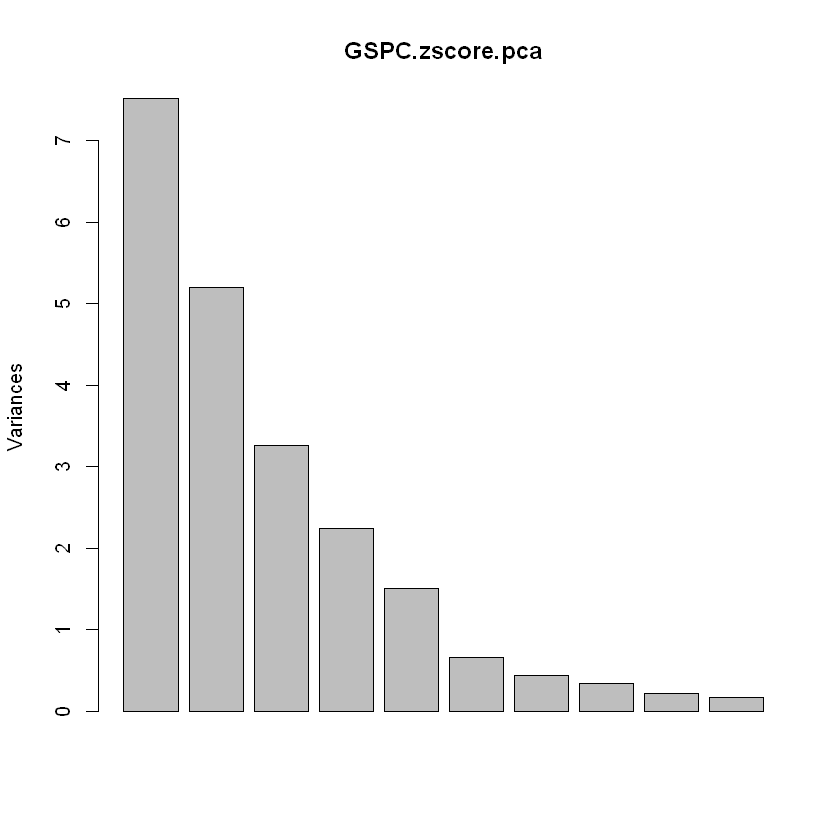

In [73]:
# gráfico da dominância dos PCAs
plot(GSPC.zscore.pca)

In [74]:
# Visualização dos dados na nova dimensão reduzida
GSPC.zscore.pcar <- princomp(GSPC.zscore)
loadings(GSPC.zscore.pcar)


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
GSPC.High       0.186  0.371                       0.139                     
GSPC.Low        0.189  0.368                       0.147                     
GSPC.Close      0.189  0.369                       0.143                     
GSPC.Return     0.121        -0.376  0.408                                   
GSPC.SMA        0.179  0.376                       0.143                     
GSPC.WMA        0.182  0.374                       0.142                     
GSPC.STD10             0.271 -0.252 -0.178        -0.584 -0.208 -0.304  0.182
GSPC.MOM        0.140        -0.351  0.394                                   
GSPC.ROC        0.121        -0.376  0.408                                   
GSPC.StochK     0.323 -0.140 -0.116                             -0.113 -0.300
GSPC.StochD     0.315 -0.126        -0.234                             -0.133
GSPC.RSI        0.285 -0.128        -0.168           

In [75]:
# Valores das novas features para os primeiros 5 casos
GSPC.zscore.pcar$scores[1:5,]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
59,3.123729,-0.49603937,-0.5161836,-2.4330904,-2.244284,-3.266119,-0.1867893,0.8832903,1.327410380,-0.09002486,...,0.03799853,0.3839124,0.02395228,-0.22288503,0.033300652,-0.004343789,0.0004244734,0.0027970841,1.870228e-14,-1.912204e-14
60,2.234137,-0.05857113,0.9205604,-3.1999316,-1.974372,-3.433499,0.3355918,0.6637272,1.199028265,0.16709624,...,-0.12704150,0.4794269,0.20158253,-0.13243492,0.002158436,-0.008032563,0.0009331926,-0.0003414442,6.911676e-15,6.732620e-15
61,2.639187,-0.65130315,0.1983433,-1.4080057,-1.834848,-2.772275,0.8407485,0.7812127,1.158701323,-0.72381156,...,-0.20572182,0.3072925,0.10274187,-0.04134552,-0.027341753,-0.005683914,0.0018832322,-0.0031542135,-4.444493e-15,2.814652e-14
62,1.226013,-0.06586206,2.0507834,-1.9678493,-1.268238,-2.820662,1.6120578,0.6606029,0.100738702,-0.19333769,...,-0.15769398,0.4374056,0.10129405,-0.01706680,-0.023054624,0.008706486,-0.0006875322,0.0014399537,3.953482e-15,-1.778060e-14
63,2.148839,-0.60360822,-0.1876070,0.8082919,-1.567408,-2.716026,1.6421683,0.9709998,0.001027024,-0.44319965,...,-0.04020145,0.1018186,-0.06853624,0.01703535,-0.012510111,0.002612964,0.0115663199,0.0008220755,5.809201e-14,3.194235e-15


No PCA1 os atributos `GSPC.STD10`, `GSPC.ADX`, `GSPC.DX`, `GSPC.BBANDS` foram desconsiderados.

**Dados minmax**

In [76]:
# Magnitude completa (variância completa)
GSPC.minmax.pca <- prcomp(x = GSPC.minmax, center = TRUE, scale. = TRUE)
summary(GSPC.minmax.pca)

# PCA com maior proporção de variância: PCA1 (35.33%)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     2.7427 2.2805 1.8064 1.4988 1.2294 0.81328 0.66042
Proportion of Variance 0.3419 0.2364 0.1483 0.1021 0.0687 0.03006 0.01983
Cumulative Proportion  0.3419 0.5783 0.7267 0.8288 0.8975 0.92753 0.94735
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58503 0.47125 0.42133 0.34609 0.34330 0.30467 0.20796
Proportion of Variance 0.01556 0.01009 0.00807 0.00544 0.00536 0.00422 0.00197
Cumulative Proportion  0.96291 0.97300 0.98107 0.98652 0.99187 0.99609 0.99806
                          PC15    PC16    PC17    PC18     PC19     PC20
Standard deviation     0.19098 0.07404 0.02459 0.01025 0.006906 0.003912
Proportion of Variance 0.00166 0.00025 0.00003 0.00000 0.000000 0.000000
Cumulative Proportion  0.99972 0.99996 0.99999 1.00000 1.000000 1.000000
                            PC21      PC22
Standard deviation     1.57

In [77]:
print('Sdev')
round(GSPC.minmax.pca$sdev, 4)

[1] "Sdev"


[1] 2.7427 2.2805 1.8064 1.4988 1.2294 0.8133 0.6604 0.5850 0.4713 0.4213
[11] 0.3461 0.3433 0.3047 0.2080 0.1910 0.0740 0.0246 0.0103 0.0069 0.0039
[21] 0.0000 0.0000

In [78]:
print('Rotation')
round(GSPC.minmax.pca$rotation, 4)

[1] "Rotation"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
GSPC.High,0.1861,0.3709,-0.0280,-0.0350,-0.0576,0.1393,0.0044,-0.0157,0.0374,-0.0090,...,-0.0092,0.0074,-0.0005,0.0033,0.1840,-0.7565,-0.4411,-0.0141,0.0000,0.0000
GSPC.Low,0.1892,0.3680,-0.0315,-0.0367,-0.0593,0.1465,0.0025,-0.0170,0.0398,-0.0068,...,-0.0084,0.0085,-0.0118,-0.0105,0.5270,0.6104,-0.3768,0.0817,0.0000,0.0000
GSPC.Close,0.1890,0.3685,-0.0260,-0.0398,-0.0581,0.1432,0.0037,-0.0170,0.0382,-0.0070,...,-0.0033,0.0063,-0.0035,-0.0067,0.3392,-0.1300,0.8133,0.0832,0.0000,0.0000
GSPC.Return,0.1206,-0.0761,0.3764,-0.4082,0.0249,-0.0331,0.0364,-0.0689,0.0861,-0.0211,...,-0.0658,-0.0141,0.0045,-0.0033,0.0027,0.0019,-0.0008,0.0002,-0.0627,-0.7043
GSPC.SMA,0.1790,0.3755,-0.0320,-0.0410,-0.0525,0.1429,0.0028,-0.0258,0.0254,-0.0128,...,-0.0017,0.0110,0.0334,0.0149,-0.6294,0.1155,-0.0281,0.6226,0.0000,0.0000
GSPC.WMA,0.1819,0.3736,-0.0322,-0.0386,-0.0543,0.1421,0.0030,-0.0248,0.0337,-0.0104,...,0.0001,0.0063,0.0231,0.0022,-0.4180,0.1573,0.0331,-0.7736,0.0000,0.0000
GSPC.STD10,-0.0086,0.2714,0.2524,0.1779,0.0529,-0.5844,-0.2084,0.3036,0.1824,-0.4436,...,0.0071,0.0044,0.0090,0.0042,0.0021,0.0046,0.0007,0.0002,0.0000,0.0000
GSPC.MOM,0.1405,-0.0615,0.3513,-0.3944,0.0197,0.0066,-0.0024,-0.0082,-0.0004,0.0477,...,0.0709,-0.1982,0.0412,0.0038,-0.0097,-0.0018,-0.0065,-0.0013,0.0000,0.0000
GSPC.ROC,0.1206,-0.0761,0.3764,-0.4082,0.0249,-0.0331,0.0364,-0.0689,0.0861,-0.0211,...,-0.0658,-0.0141,0.0045,-0.0033,0.0027,0.0019,-0.0008,0.0002,0.0627,0.7043
GSPC.StochK,0.3225,-0.1397,0.1155,0.0961,0.0063,0.0658,-0.0906,0.1132,-0.3001,-0.1784,...,0.3043,0.3066,-0.0245,-0.0023,-0.0010,-0.0005,-0.0012,-0.0014,-0.7043,0.0627


In [79]:
print('Center')
round(GSPC.minmax.pca$center, 4)

[1] "Center"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
        0.3562         0.3580         0.3582         0.3941         0.3514 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
        0.3528         0.3787         0.4985         0.3941         0.6107 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
        0.6068         0.5502         0.3893         0.4191         0.3410 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
        0.5629         0.5066         0.4889         0.4872         0.4840 
GSPC.Histogram    GSPC.BBANDS 
        0.5023         0.3798

In [80]:
print('Scale')
round(GSPC.minmax.pca$scale, 4)

[1] "Scale"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
        0.2520         0.2497         0.2505         0.2321         0.2532 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
        0.2525         0.2622         0.2275         0.2321         0.3145 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
        0.2937         0.2254         0.3145         0.2219         0.2313 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
        0.1801         0.1747         0.1985         0.2025         0.2033 
GSPC.Histogram    GSPC.BBANDS 
        0.2081         0.2618

In [81]:
# scores para as dimensões
head(round(GSPC.minmax.pca$x, 4))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
59,3.1237,-0.4960,0.5162,2.4331,2.2443,-3.2661,-0.1868,-0.8833,1.3274,0.0900,...,-0.0380,0.3839,-0.0240,-0.2229,0.0333,0.0043,-0.0004,-0.0028,0,0
60,2.2341,-0.0586,-0.9206,3.1999,1.9744,-3.4335,0.3356,-0.6637,1.1990,-0.1671,...,0.1270,0.4794,-0.2016,-0.1324,0.0022,0.0080,-0.0009,0.0003,0,0
61,2.6392,-0.6513,-0.1983,1.4080,1.8348,-2.7723,0.8407,-0.7812,1.1587,0.7238,...,0.2057,0.3073,-0.1027,-0.0413,-0.0273,0.0057,-0.0019,0.0032,0,0
62,1.2260,-0.0659,-2.0508,1.9678,1.2682,-2.8207,1.6121,-0.6606,0.1007,0.1933,...,0.1577,0.4374,-0.1013,-0.0171,-0.0231,-0.0087,0.0007,-0.0014,0,0
63,2.1488,-0.6036,0.1876,-0.8083,1.5674,-2.7160,1.6422,-0.9710,0.0010,0.4432,...,0.0402,0.1018,0.0685,0.0170,-0.0125,-0.0026,-0.0116,-0.0008,0,0
64,1.8271,-0.5655,-1.0652,-0.1966,1.6017,-2.2828,1.9046,-1.4325,-0.9239,0.3496,...,0.2506,0.1883,-0.0854,0.0016,-0.0076,0.0034,0.0058,0.0011,0,0


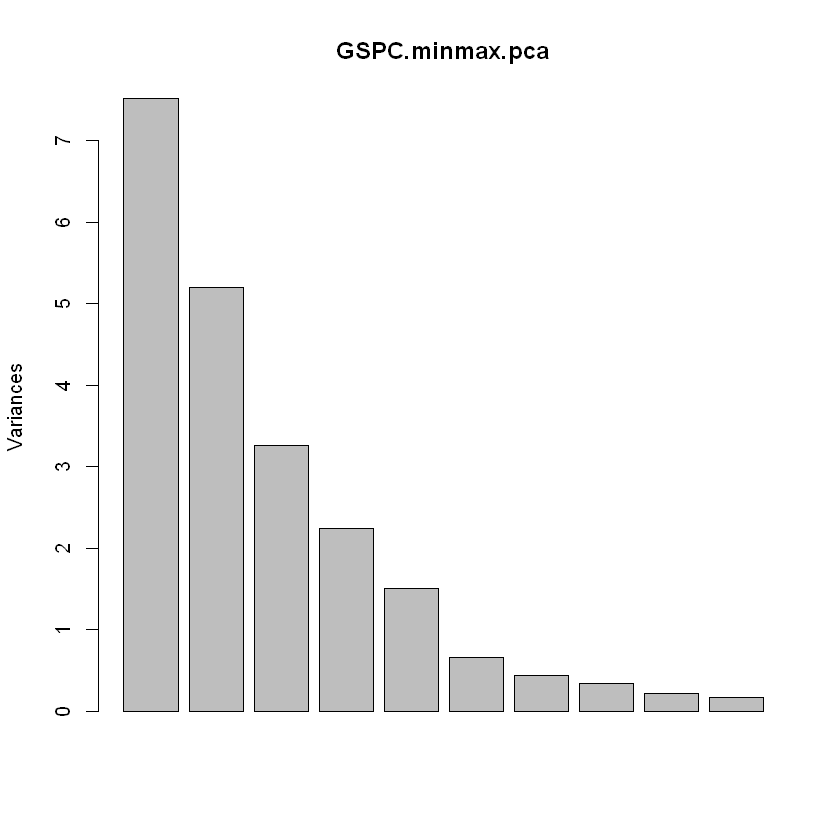

In [82]:
# gráfico da dominância dos PCAs
plot(GSPC.minmax.pca)

In [83]:
# Visualização dos dados na nova dimensão reduzida
GSPC.minmax.pcar <- princomp(GSPC.minmax)
loadings(GSPC.minmax.pcar)


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
GSPC.High       0.196  0.363                       0.135                     
GSPC.Low        0.197  0.357                       0.139                     
GSPC.Close      0.197  0.359                       0.137                     
GSPC.Return     0.119        -0.391  0.392                              0.106
GSPC.SMA        0.189  0.370                       0.139                     
GSPC.WMA        0.191  0.367                       0.137                     
GSPC.STD10             0.282 -0.311 -0.259        -0.530 -0.304 -0.426  0.162
GSPC.MOM        0.135        -0.353  0.375                                   
GSPC.ROC        0.119        -0.391  0.392                              0.106
GSPC.StochK     0.418 -0.194                                           -0.356
GSPC.StochD     0.374 -0.163  0.103 -0.254                                   
GSPC.RSI        0.262 -0.126        -0.139           

In [84]:
# Valores das novas features para os primeiros 5 casos
GSPC.minmax.pcar$scores[1:5,]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
59,0.6781490,-0.06585243,-0.22415622,-0.68774524,-0.4180648,-0.7522120,-0.04037881,0.1758935,0.322627605,0.029686556,...,-0.088467861,0.06796151,-0.0129581613,-0.045242133,0.0083030803,-0.0010977803,0.0001120714,0.0007053938,9.613919e-16,-1.078393e-15
60,0.4490280,0.04673129,0.09376666,-0.85736332,-0.3517557,-0.7928638,0.06725679,0.1172592,0.261685502,0.087262633,...,-0.114206569,0.07457257,0.0181252213,-0.026809117,0.0004750791,-0.0020135154,0.0002436923,-0.0000869264,7.830397e-16,1.623123e-15
61,0.5315505,-0.10713833,-0.05606137,-0.42276793,-0.3627216,-0.6466410,0.23256111,0.2170809,0.253786497,-0.115691828,...,-0.062567917,0.02568141,0.0031049191,-0.008290224,-0.0069115328,-0.0014124938,0.0004791058,-0.0007967414,1.281597e-15,3.257377e-15
62,0.1929654,0.03160106,0.35147363,-0.54506375,-0.2360253,-0.6676113,0.39729437,0.1788848,-0.008200903,0.002011505,...,-0.077390336,0.06619460,-0.0005385738,-0.003294377,-0.0057877334,0.0021922327,-0.0001827170,0.0003644617,-2.089063e-16,-2.658977e-15
63,0.4095549,-0.10178722,-0.18373296,0.06790096,-0.3361688,-0.6578663,0.41906540,0.2568224,0.005563890,-0.043398698,...,-0.003930029,0.01062755,-0.0210102858,0.003532680,-0.0031301475,0.0006891892,0.0028956766,0.0002088225,9.571794e-15,2.822144e-15


No PCA1 os atributos `GSPC.STD10`, `GSPC.ADX`, `GSPC.DX`, `GSPC.TRIX`, `GSPC.BBANDS` foram desconsiderados.

# 6. Separação dos dados de treino e de teste

In [85]:
# Biblioteca(s) Necessária(s)
library(keras)

Warning message:
"package 'keras' was built under R version 3.6.3"

## 6.1. Amostra pós seleção de atributos

**Dados z-score**

In [86]:
# Nova amostra a partir da seleção de atributos (considerando todos os atributos que foram desconsiderados)
GSPC.zscore2 <- GSPC.zscore[, !(names(GSPC.zscore) %in% c('GSPC.STD10', 'GSPC.ADX', 'GSPC.DX', 'GSPC.BBANDS'))]
head(GSPC.zscore2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram
59,-0.2188064,-0.2148310,-0.2214329,-0.08217814,-0.2962630,-0.2588267,-0.2990188229,-0.08217814,0.7925936,0.9951601,1.4207371,-0.7925936,0.9920701,1.6346607,0.2885589,2.254090,1.252630,2.3917836
60,-0.2291535,-0.2311024,-0.2444458,-1.15944405,-0.2749835,-0.2491301,-1.1505754037,-1.15944405,0.5064170,0.7887744,0.7524961,-0.5064170,0.7264591,1.2946875,0.5425899,2.274663,1.482729,2.3917836
61,-0.2375650,-0.2448980,-0.2433186,-0.08217814,-0.2583151,-0.2430805,-0.0006681932,-0.08217814,0.5064170,0.6511840,1.0373638,-0.5064170,0.5764832,1.0768774,0.7119440,2.264376,1.668999,2.2131968
62,-0.2433576,-0.2775553,-0.2727089,-1.15944405,-0.2541050,-0.2454117,-1.4543629469,-1.15944405,0.1884429,0.4447983,-0.3993988,-0.1884429,0.3399650,0.8347609,0.8812980,2.110076,1.789527,1.3689682
63,-0.2398990,-0.2636022,-0.2575003,0.99508777,-0.2492076,-0.2457406,0.6701110130,0.99508777,0.3474299,0.3760031,-0.2809258,-0.3474299,0.3668484,1.1062344,0.9659750,2.017495,1.855270,0.8819133
64,-0.2578607,-0.2599101,-0.2469568,-0.08217814,-0.2421479,-0.2450398,0.4478771726,-0.08217814,0.4746195,0.3760031,-1.0228243,-0.4746195,0.3100435,1.6179303,1.1353290,1.966061,1.910055,0.5572101


In [87]:
GSPC.zscore3 <- as.data.frame(cbind(GSPC.zscore2, Direction.df))
head(GSPC.zscore3)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,-0.2188064,-0.2148310,-0.2214329,-0.08217814,-0.2962630,-0.2588267,-0.2990188229,-0.08217814,0.7925936,0.9951601,1.4207371,-0.7925936,0.9920701,1.6346607,0.2885589,2.254090,1.252630,2.3917836,1,up
60,-0.2291535,-0.2311024,-0.2444458,-1.15944405,-0.2749835,-0.2491301,-1.1505754037,-1.15944405,0.5064170,0.7887744,0.7524961,-0.5064170,0.7264591,1.2946875,0.5425899,2.274663,1.482729,2.3917836,1,up
61,-0.2375650,-0.2448980,-0.2433186,-0.08217814,-0.2583151,-0.2430805,-0.0006681932,-0.08217814,0.5064170,0.6511840,1.0373638,-0.5064170,0.5764832,1.0768774,0.7119440,2.264376,1.668999,2.2131968,1,up
62,-0.2433576,-0.2775553,-0.2727089,-1.15944405,-0.2541050,-0.2454117,-1.4543629469,-1.15944405,0.1884429,0.4447983,-0.3993988,-0.1884429,0.3399650,0.8347609,0.8812980,2.110076,1.789527,1.3689682,1,up
63,-0.2398990,-0.2636022,-0.2575003,0.99508777,-0.2492076,-0.2457406,0.6701110130,0.99508777,0.3474299,0.3760031,-0.2809258,-0.3474299,0.3668484,1.1062344,0.9659750,2.017495,1.855270,0.8819133,1,up
64,-0.2578607,-0.2599101,-0.2469568,-0.08217814,-0.2421479,-0.2450398,0.4478771726,-0.08217814,0.4746195,0.3760031,-1.0228243,-0.4746195,0.3100435,1.6179303,1.1353290,1.966061,1.910055,0.5572101,1,up


**Dados minmax**

In [88]:
# Nova amostra a partir da seleção de atributos (considerando todos os atributos que foram desconsiderados
GSPC.minmax2 <- GSPC.minmax[, !(names(GSPC.minmax) %in% c('GSPC.STD10', 'GSPC.ADX', 'GSPC.DX', 'GSPC.TRIX', 'GSPC.BBANDS'))]
head(GSPC.minmax2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram
59,0.3010505,0.3043239,0.3027750,0.375,0.2764395,0.2874437,0.4305040,0.375,0.86,0.8989899,0.8704,0.14,0.7415028,0.7921627,0.9437500,0.7385857,1.0000000
60,0.2984430,0.3002611,0.2970113,0.125,0.2818271,0.2898919,0.2367811,0.125,0.77,0.8383838,0.7198,0.23,0.6936729,0.7327727,0.9479167,0.7853563,1.0000000
61,0.2963232,0.2968165,0.2972936,0.375,0.2860473,0.2914193,0.4983766,0.375,0.77,0.7979798,0.7840,0.23,0.6666660,0.6947234,0.9458333,0.8232183,0.9628378
62,0.2948635,0.2886623,0.2899327,0.125,0.2871132,0.2908307,0.1676716,0.125,0.67,0.7373737,0.4602,0.33,0.6240750,0.6524281,0.9145833,0.8477171,0.7871622
63,0.2957351,0.2921463,0.2937418,0.625,0.2883532,0.2907476,0.6509740,0.625,0.72,0.7171717,0.4869,0.28,0.6289160,0.6998518,0.8958333,0.8610802,0.6858108
64,0.2912086,0.2930682,0.2963824,0.375,0.2901406,0.2909246,0.6004174,0.375,0.76,0.7171717,0.3197,0.24,0.6186868,0.7892400,0.8854167,0.8722160,0.6182432


In [89]:
GSPC.minmax3 <- as.data.frame(cbind(GSPC.minmax2, Direction.df))
head(GSPC.minmax3)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,0.3010505,0.3043239,0.3027750,0.375,0.2764395,0.2874437,0.4305040,0.375,0.86,0.8989899,0.8704,0.14,0.7415028,0.7921627,0.9437500,0.7385857,1.0000000,1,up
60,0.2984430,0.3002611,0.2970113,0.125,0.2818271,0.2898919,0.2367811,0.125,0.77,0.8383838,0.7198,0.23,0.6936729,0.7327727,0.9479167,0.7853563,1.0000000,1,up
61,0.2963232,0.2968165,0.2972936,0.375,0.2860473,0.2914193,0.4983766,0.375,0.77,0.7979798,0.7840,0.23,0.6666660,0.6947234,0.9458333,0.8232183,0.9628378,1,up
62,0.2948635,0.2886623,0.2899327,0.125,0.2871132,0.2908307,0.1676716,0.125,0.67,0.7373737,0.4602,0.33,0.6240750,0.6524281,0.9145833,0.8477171,0.7871622,1,up
63,0.2957351,0.2921463,0.2937418,0.625,0.2883532,0.2907476,0.6509740,0.625,0.72,0.7171717,0.4869,0.28,0.6289160,0.6998518,0.8958333,0.8610802,0.6858108,1,up
64,0.2912086,0.2930682,0.2963824,0.375,0.2901406,0.2909246,0.6004174,0.375,0.76,0.7171717,0.3197,0.24,0.6186868,0.7892400,0.8854167,0.8722160,0.6182432,1,up


## 6.2. Separação das amostras

**Dados z-score**

In [90]:
# Determinação das amostras
GSPC.zscore.split <- sample(2, nrow(GSPC.zscore3), replace = TRUE, prob = c(0.70, 0.30))

In [91]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
GSPC.zscore.train <- GSPC.zscore3[GSPC.zscore.split == 1,]
GSPC.zscore.test <- GSPC.zscore3[GSPC.zscore.split == 2,]

In [92]:
head(GSPC.zscore.train)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
60,-0.2291535,-0.2311024,-0.2444458,-1.15944405,-0.2749835,-0.2491301,-1.1505754037,-1.15944405,0.50641696,0.78877444,0.7524961,-0.50641696,0.7264591,1.2946875,0.5425899,2.274663,1.482729,2.3917836,1,up
61,-0.2375650,-0.2448980,-0.2433186,-0.08217814,-0.2583151,-0.2430805,-0.0006681932,-0.08217814,0.50641696,0.65118398,1.0373638,-0.50641696,0.5764832,1.0768774,0.7119440,2.264376,1.668999,2.2131968,1,up
62,-0.2433576,-0.2775553,-0.2727089,-1.15944405,-0.2541050,-0.2454117,-1.4543629469,-1.15944405,0.18844287,0.44479830,-0.3993988,-0.18844287,0.3399650,0.8347609,0.8812980,2.110076,1.789527,1.3689682,1,up
63,-0.2398990,-0.2636022,-0.2575003,0.99508777,-0.2492076,-0.2457406,0.6701110130,0.99508777,0.34742992,0.37600307,-0.2809258,-0.34742992,0.3668484,1.1062344,0.9659750,2.017495,1.855270,0.8819133,1,up
64,-0.2578607,-0.2599101,-0.2469568,-0.08217814,-0.2421479,-0.2450398,0.4478771726,-0.08217814,0.47461955,0.37600307,-1.0228243,-0.47461955,0.3100435,1.6179303,1.1353290,1.966061,1.910055,0.5572101,1,up
67,-0.2513563,-0.2593233,-0.2535625,0.99508777,-0.2476467,-0.2554229,0.8950633101,0.99508777,0.02945583,-0.07116591,-0.4198099,-0.02945583,0.2202789,0.3950370,1.3893600,1.606026,1.855270,-0.4168997,1,up


In [93]:
head(GSPC.zscore.test)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,-0.2188064,-0.2148310,-0.2214329,-0.08217814,-0.2962630,-0.2588267,-0.2990188,-0.08217814,0.79259363,0.9951601,1.4207371,-0.79259363,0.99207014,1.6346607,0.2885589,2.2540897,1.2526300,2.3917836,1,up
65,-0.2304487,-0.3608729,-0.2629931,-1.15944405,-0.2420190,-0.2485294,-0.8182441,-1.15944405,0.09305065,0.3416055,-1.2540019,-0.09305065,0.03200347,1.1744184,1.2200060,1.8426208,1.9210121,0.1350958,1,up
66,-0.2587714,-0.2726609,-0.2734937,-0.08217814,-0.2439236,-0.2539641,-0.5545538,-0.08217814,-0.28851825,0.1008222,-1.3143477,0.28851825,0.12931748,0.2735052,1.3046830,1.6780333,1.8881408,-0.2870184,1,up
71,-0.2551707,-0.2896908,-0.3023132,-1.69807700,-0.2589595,-0.2608576,-2.1914045,-1.69807700,-0.76547938,-0.2431540,-1.1124555,0.76547938,-0.70038340,-1.5055932,1.4740370,1.1328370,1.6251708,-1.2286579,1,up
72,-0.3000887,-0.3280583,-0.3403494,-1.69807700,-0.2657471,-0.2754025,-1.8662091,-1.69807700,-1.30603532,-0.7247206,-1.2952678,1.30603532,-1.78197748,-1.7912717,1.4740370,0.7419415,1.4608146,-1.9754755,0,down
79,-0.2998751,-0.3416249,-0.2876610,2.61098663,-0.3430605,-0.3467397,2.2043400,2.61098663,0.41102473,-0.1399611,0.1153154,-0.41102473,-0.33626145,-0.4421115,0.5425899,-0.4821785,-0.1389195,-1.0987766,0,down


**Dados minmax**

In [94]:
# Determinação das amostras
GSPC.minmax.split <- sample(2, nrow(GSPC.minmax3), replace = TRUE, prob = c(0.70, 0.30))

In [95]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
GSPC.minmax.train <- GSPC.minmax3[GSPC.minmax.split == 1,]
GSPC.minmax.test <- GSPC.minmax3[GSPC.minmax.split == 2,]

In [96]:
head(GSPC.minmax.train)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,0.3010505,0.3043239,0.3027750,0.375,0.2764395,0.2874437,0.4305040,0.375,0.86,0.8989899,0.8704,0.14,0.7415028,0.7921627,0.9437500,0.7385857,1.0000000,1,up
61,0.2963232,0.2968165,0.2972936,0.375,0.2860473,0.2914193,0.4983766,0.375,0.77,0.7979798,0.7840,0.23,0.6666660,0.6947234,0.9458333,0.8232183,0.9628378,1,up
62,0.2948635,0.2886623,0.2899327,0.125,0.2871132,0.2908307,0.1676716,0.125,0.67,0.7373737,0.4602,0.33,0.6240750,0.6524281,0.9145833,0.8477171,0.7871622,1,up
64,0.2912086,0.2930682,0.2963824,0.375,0.2901406,0.2909246,0.6004174,0.375,0.76,0.7171717,0.3197,0.24,0.6186868,0.7892400,0.8854167,0.8722160,0.6182432,1,up
67,0.2928478,0.2932147,0.2947280,0.625,0.2887484,0.2883031,0.7021490,0.625,0.62,0.5858586,0.4556,0.38,0.6025225,0.5756126,0.8125000,0.8610802,0.4155405,1,up
68,0.2953298,0.2982065,0.3000915,0.625,0.2883459,0.2890902,0.7182282,0.625,0.73,0.6161616,0.5454,0.27,0.6296123,0.6417301,0.8125000,0.8543987,0.4358108,1,up


In [97]:
head(GSPC.minmax.test)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
60,0.2984430,0.3002611,0.2970113,0.125,0.2818271,0.2898919,0.2367811,0.125,0.77,0.8383838,0.7198,0.23,0.6936729,0.7327727,0.9479167,0.7853563,1.0000000,1,up
63,0.2957351,0.2921463,0.2937418,0.625,0.2883532,0.2907476,0.6509740,0.625,0.72,0.7171717,0.4869,0.28,0.6289160,0.6998518,0.8958333,0.8610802,0.6858108,1,up
65,0.2981166,0.2678588,0.2923661,0.125,0.2901732,0.2900435,0.3123840,0.125,0.64,0.7070707,0.2676,0.36,0.5686188,0.7117629,0.8604167,0.8744432,0.5304054,1,up
66,0.2909791,0.2898844,0.2897361,0.375,0.2896910,0.2886714,0.3723717,0.375,0.52,0.6363636,0.2540,0.48,0.5861426,0.5543822,0.8270833,0.8677617,0.4425676,1,up
69,0.2983820,0.2989247,0.2958429,0.125,0.2876426,0.2891697,0.3023346,0.125,0.65,0.6666667,0.6067,0.35,0.6226658,0.4946614,0.7958333,0.8477171,0.4020270,1,up
73,0.2672928,0.2403411,0.2429940,0.000,0.2790137,0.2743830,0.0000000,0.000,0.09,0.2121212,0.1535,0.91,0.0000000,0.1054007,0.4791667,0.7207684,0.0000000,0,down


# 7. Predição

## 7.1. Regressão Logística

## 7.1.1. Dados z-score

**Dados de treino**

In [168]:
train.zscore.model <- glm(GSPC.Direction ~., 
                          data = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                          family = binomial)
summary(train.zscore.model)


Call:
glm(formula = GSPC.Direction ~ ., family = binomial, data = GSPC.zscore.train[, 
    !(names(GSPC.zscore.train) %in% c("GSPC.Trend"))])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1755  -0.0863   0.0660   0.2442   3.0893  

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.10761    0.08211  13.490  < 2e-16 ***
GSPC.High      -28.34081    8.50216  -3.333 0.000858 ***
GSPC.Low       -18.90795    5.72320  -3.304 0.000954 ***
GSPC.Close      58.60177   10.95296   5.350 8.78e-08 ***
GSPC.Return      0.70441    0.18995   3.708 0.000209 ***
GSPC.SMA        31.21692   13.85406   2.253 0.024242 *  
GSPC.WMA       -42.42432   16.67274  -2.545 0.010942 *  
GSPC.MOM        -0.52183    0.21646  -2.411 0.015917 *  
GSPC.ROC              NA         NA      NA       NA    
GSPC.StochK     -0.87430    0.28913  -3.024 0.002496 ** 
GSPC.StochD     -1.17299    0.30366  -3.863 0.000112 ***
GSP

In [169]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
train.zscore.pred <- predict(train.zscore.model, 
                             GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [170]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
train.zscore.prob <- 1 / (1 + exp(-(train.zscore.pred)))
head(train.zscore.prob) 

60        61        62        63        64        67 
0.9999946 0.9999975 0.9999822 0.9999871 0.9999750 0.9998922

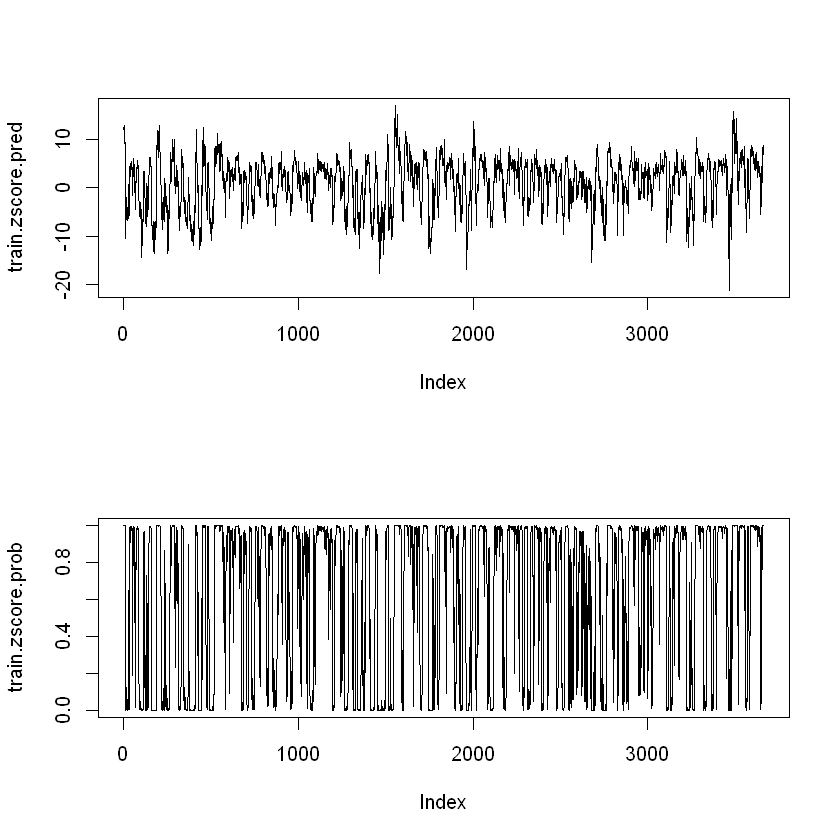

In [171]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(train.zscore.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(train.zscore.prob, type = "l")

In [172]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
train.zscore.pred.direction <- NULL

# Direção para cima (Up)
train.zscore.pred.direction[train.zscore.prob > 0.5] <- 1    

# Direção para baixo (Down)
train.zscore.pred.direction[train.zscore.prob <= 0.5] <- 0

In [173]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.pred.direction,
                      GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                           
train.zscore.pred.direction    0    1
                          0 1205  122
                          1  165 2174
                                          
               Accuracy : 0.9217          
                 95% CI : (0.9125, 0.9302)
    No Information Rate : 0.6263          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8317          
                                          
 Mcnemar's Test P-Value : 0.01317         
                                          
            Sensitivity : 0.8796          
            Specificity : 0.9469          
         Pos Pred Value : 0.9081          
         Neg Pred Value : 0.9295          
             Prevalence : 0.3737          
         Detection Rate : 0.3287          
   Detection Prevalence : 0.3620          
      Balanced Accuracy : 0.9132          
                                          
       '

In [105]:
# Packages
library(PRROC)

Warning message:
"package 'PRROC' was built under R version 3.6.3"

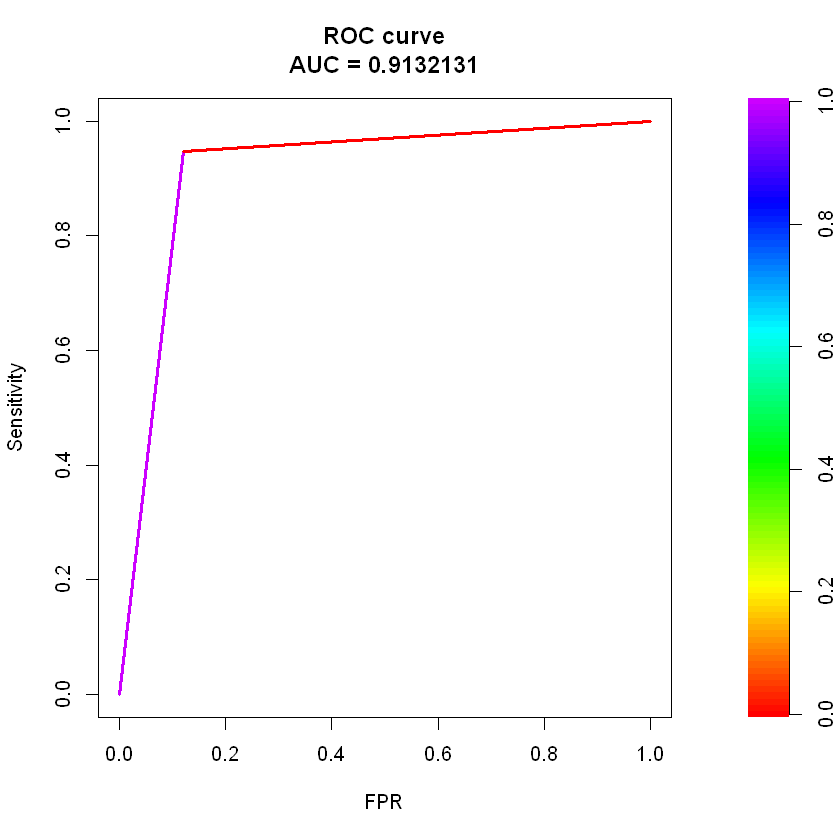

In [174]:
plot(roc.curve(scores.class0 = train.zscore.pred.direction, 
               weights.class0 = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

Sinais claros de *overfitting*

**Dados de teste**

In [175]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
test.zscore.pred <- predict(train.zscore.model,
                            GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [176]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
test.zscore.prob <- 1 / (1 + exp(-(test.zscore.pred)))
head(test.zscore.prob) 

59         65         66         71         72         79 
0.99999762 0.99993381 0.99988832 0.90565349 0.08252398 0.14272226

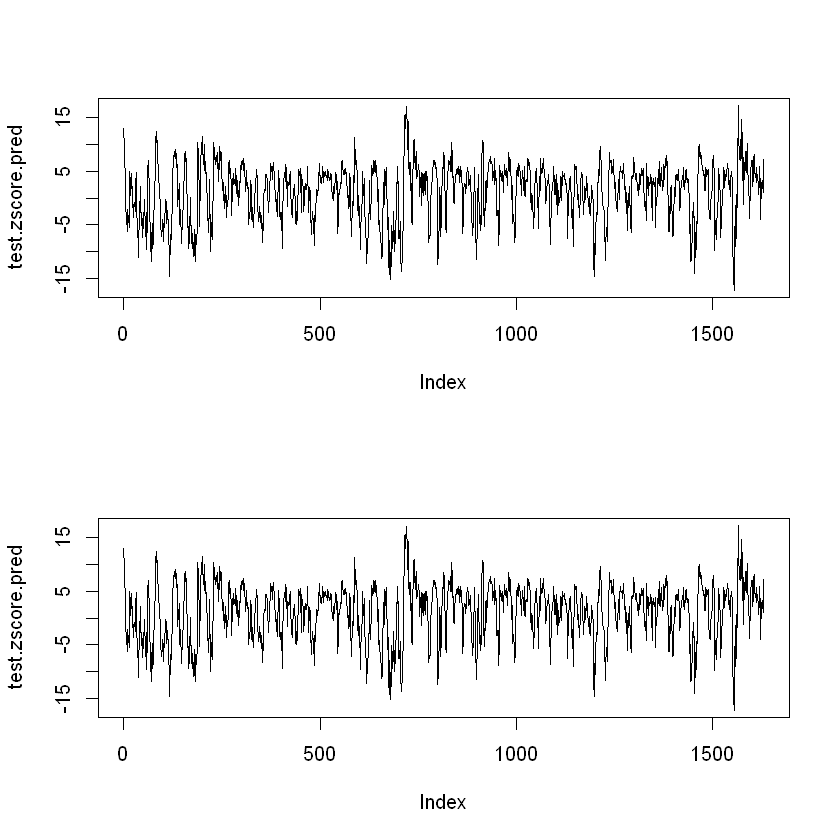

In [177]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(test.zscore.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(test.zscore.pred, type = "l")

In [178]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
test.zscore.pred.direction <- NULL

# Direção para cima (Up)
test.zscore.pred.direction[test.zscore.prob > 0.5] <- 1    

# Direção para baixo (Down)
test.zscore.pred.direction[test.zscore.prob <= 0.5] <- 0

In [179]:
# Matriz de Confusão de treino
confusionMatrix(table(test.zscore.pred.direction,
                      GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                          
test.zscore.pred.direction   0   1
                         0 519  55
                         1  80 976
                                          
               Accuracy : 0.9172          
                 95% CI : (0.9027, 0.9301)
    No Information Rate : 0.6325          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8203          
                                          
 Mcnemar's Test P-Value : 0.03887         
                                          
            Sensitivity : 0.8664          
            Specificity : 0.9467          
         Pos Pred Value : 0.9042          
         Neg Pred Value : 0.9242          
             Prevalence : 0.3675          
         Detection Rate : 0.3184          
   Detection Prevalence : 0.3521          
      Balanced Accuracy : 0.9065          
                                          
       'Positive' 

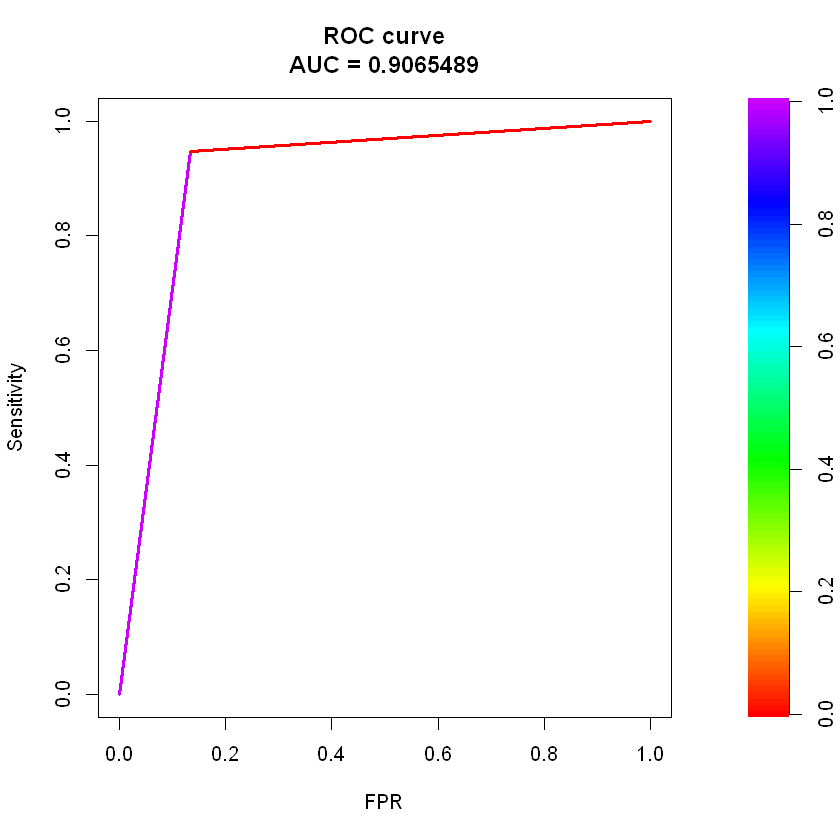

In [180]:
plot(roc.curve(scores.class0 = test.zscore.pred.direction, 
               weights.class0 = GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

Apesar de o % de acurácia para os dados de teste ser menor, ainda há sinais de *overfitting*

## 7.1.2 Dados minmax

**Dados de treino**

In [181]:
train.minmax.model <- glm(GSPC.Direction ~.,
                          data = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                          family = binomial)
summary(train.minmax.model)


Call:
glm(formula = GSPC.Direction ~ ., family = binomial, data = GSPC.minmax.train[, 
    !(names(GSPC.minmax.train) %in% c("GSPC.Trend"))])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7162  -0.0908   0.0821   0.2778   3.9533  

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -16.3021     0.9335 -17.463  < 2e-16 ***
GSPC.High      -119.0435    30.8106  -3.864 0.000112 ***
GSPC.Low        -91.9228    21.2723  -4.321 1.55e-05 ***
GSPC.Close      262.6817    40.7723   6.443 1.17e-10 ***
GSPC.Return       2.2763     0.7710   2.952 0.003155 ** 
GSPC.SMA        210.4000    52.5254   4.006 6.18e-05 ***
GSPC.WMA       -261.6223    67.7603  -3.861 0.000113 ***
GSPC.MOM         -2.4252     0.8559  -2.834 0.004602 ** 
GSPC.ROC              NA         NA      NA       NA    
GSPC.StochK      -3.9324     0.8970  -4.384 1.17e-05 ***
GSPC.StochD      -4.3842     0.9840  -4.455 8.37e-06 ***
GSP

In [182]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
train.minmax.pred <- predict(train.minmax.model, GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [183]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
train.minmax.prob <- 1 / (1 + exp(-(train.minmax.pred)))
head(train.minmax.prob) 

59        61        62        64        67        68 
0.9999930 0.9999931 0.9999370 0.9999059 0.9994000 0.9995515

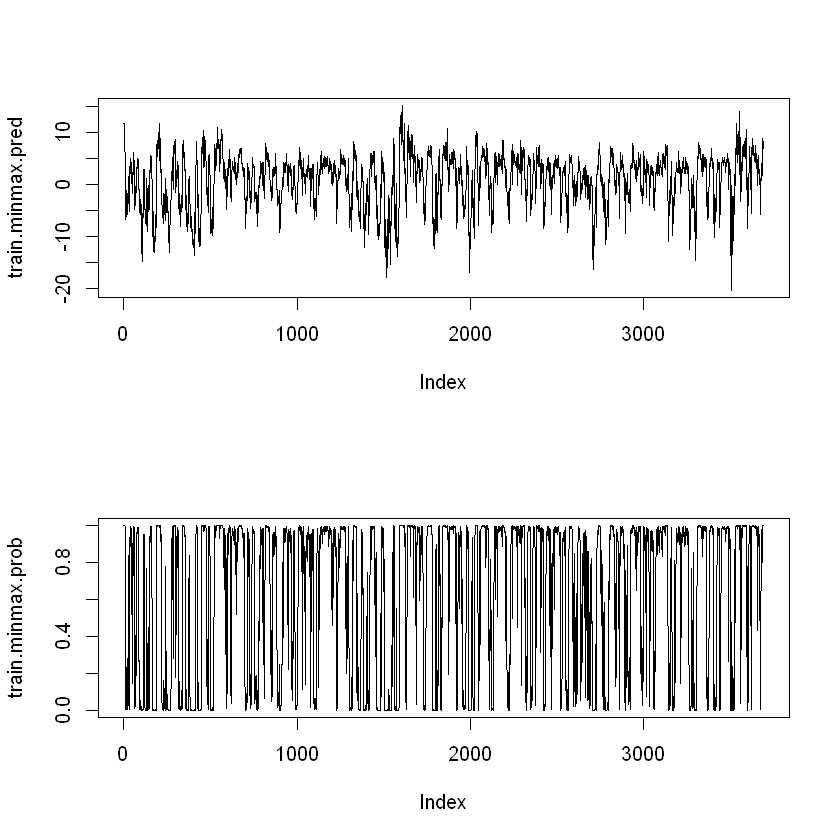

In [184]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(train.minmax.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(train.minmax.prob, type = "l")

In [185]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
train.minmax.pred.direction <- NULL

# Direção para cima (Up)
train.minmax.pred.direction[train.minmax.prob > 0.5] <- 1    

# Direção para baixo (Down)
train.minmax.pred.direction[train.minmax.prob <= 0.5] <- 0

In [186]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.pred.direction,
                      GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                           
train.minmax.pred.direction    0    1
                          0 1193  130
                          1  176 2195
                                          
               Accuracy : 0.9172          
                 95% CI : (0.9078, 0.9259)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8212          
                                          
 Mcnemar's Test P-Value : 0.0101          
                                          
            Sensitivity : 0.8714          
            Specificity : 0.9441          
         Pos Pred Value : 0.9017          
         Neg Pred Value : 0.9258          
             Prevalence : 0.3706          
         Detection Rate : 0.3230          
   Detection Prevalence : 0.3581          
      Balanced Accuracy : 0.9078          
                                          
       '

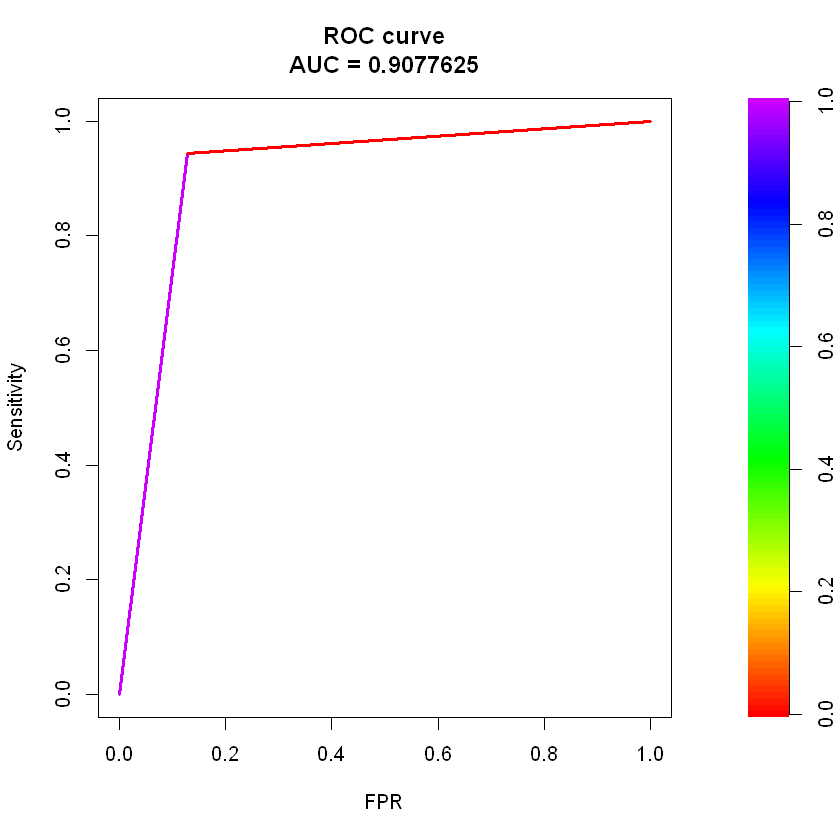

In [187]:
plot(roc.curve(scores.class0 = train.minmax.pred.direction, 
               weights.class0 = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

**Dados de teste**

In [188]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
test.minmax.pred <- predict(train.minmax.model, GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [189]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
test.minmax.prob <- 1 / (1 + exp(-(test.minmax.pred)))
head(test.minmax.prob) 

60           63           65           66           69           73 
9.999892e-01 9.999074e-01 9.998262e-01 9.994223e-01 9.954124e-01 5.233406e-06

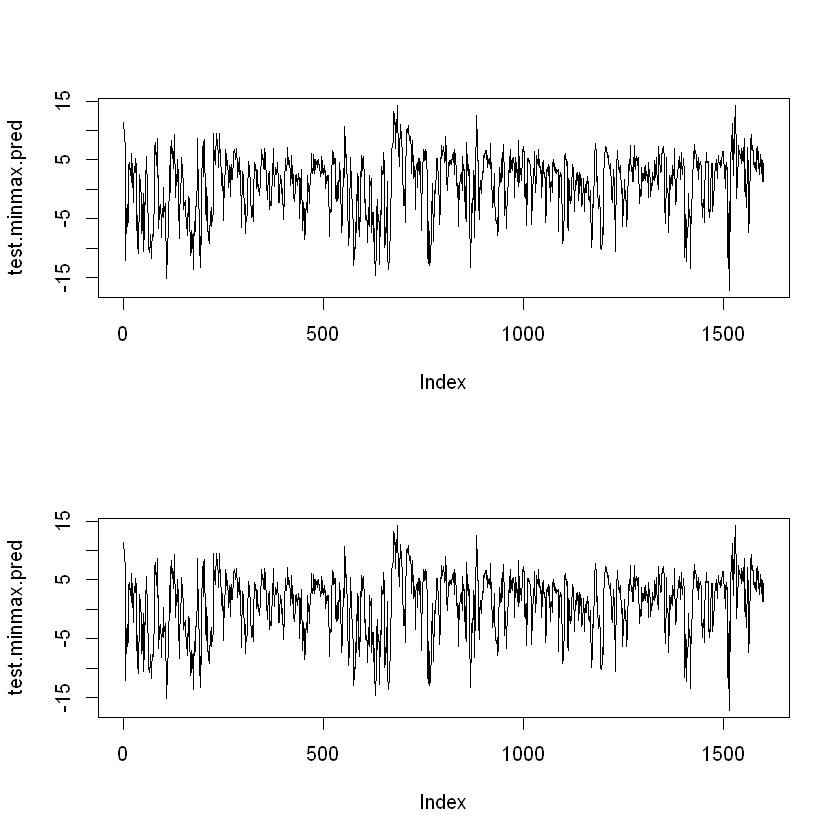

In [190]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(test.minmax.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(test.minmax.pred, type = "l")

In [191]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
test.minmax.pred.direction <- NULL

# Direção para cima (Up)
test.minmax.pred.direction[test.minmax.prob > 0.5] <- 1    

# Direção para baixo (Down)
test.minmax.pred.direction[test.minmax.prob <= 0.5] <- 0

In [192]:
# Matriz de Confusão de treino
confusionMatrix(table(test.minmax.pred.direction,
                      GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                          
test.minmax.pred.direction   0   1
                         0 519  48
                         1  81 954
                                          
               Accuracy : 0.9195          
                 95% CI : (0.9051, 0.9323)
    No Information Rate : 0.6255          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8262          
                                          
 Mcnemar's Test P-Value : 0.004841        
                                          
            Sensitivity : 0.8650          
            Specificity : 0.9521          
         Pos Pred Value : 0.9153          
         Neg Pred Value : 0.9217          
             Prevalence : 0.3745          
         Detection Rate : 0.3240          
   Detection Prevalence : 0.3539          
      Balanced Accuracy : 0.9085          
                                          
       'Positive' 

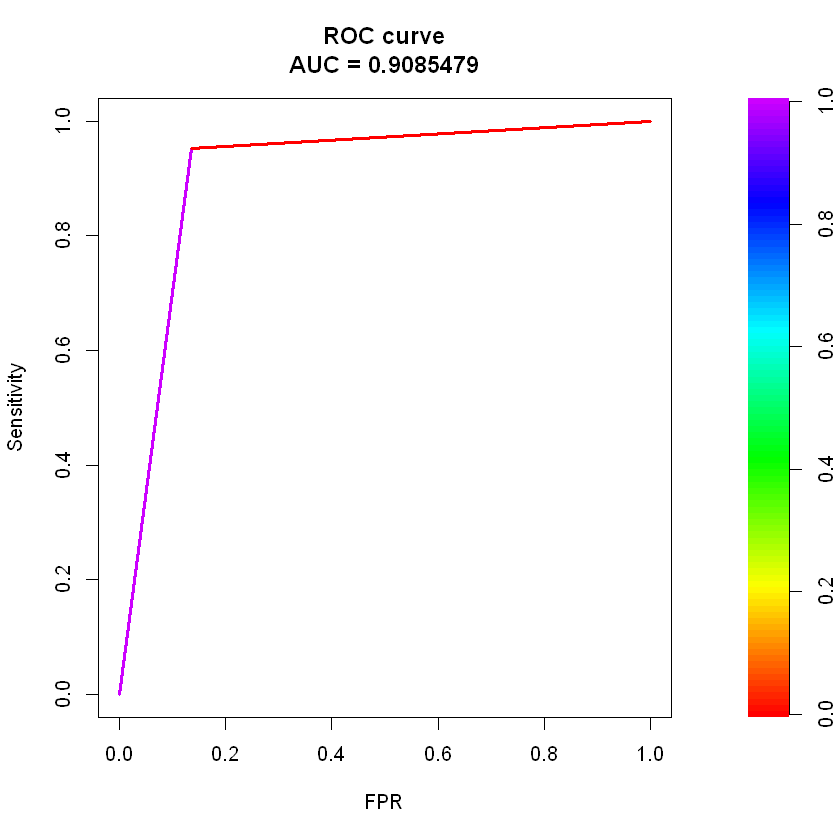

In [193]:
plot(roc.curve(scores.class0 = test.minmax.pred.direction, 
               weights.class0 = GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction,
               curve=TRUE))

Apesar de o % de acurácia para os dados de teste ser menor, ainda há sinais de *overfitting*

## 7.2. Árvore de Decisão

In [126]:
# Packages
library(rpart) 
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

### 7.2.1. Dados z-score

**Dados de treino**

In [194]:
# Criação da árvore de decisão
train.zscore.model.dt <- rpart(GSPC.Direction ~.,
                               GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                               method = "class")

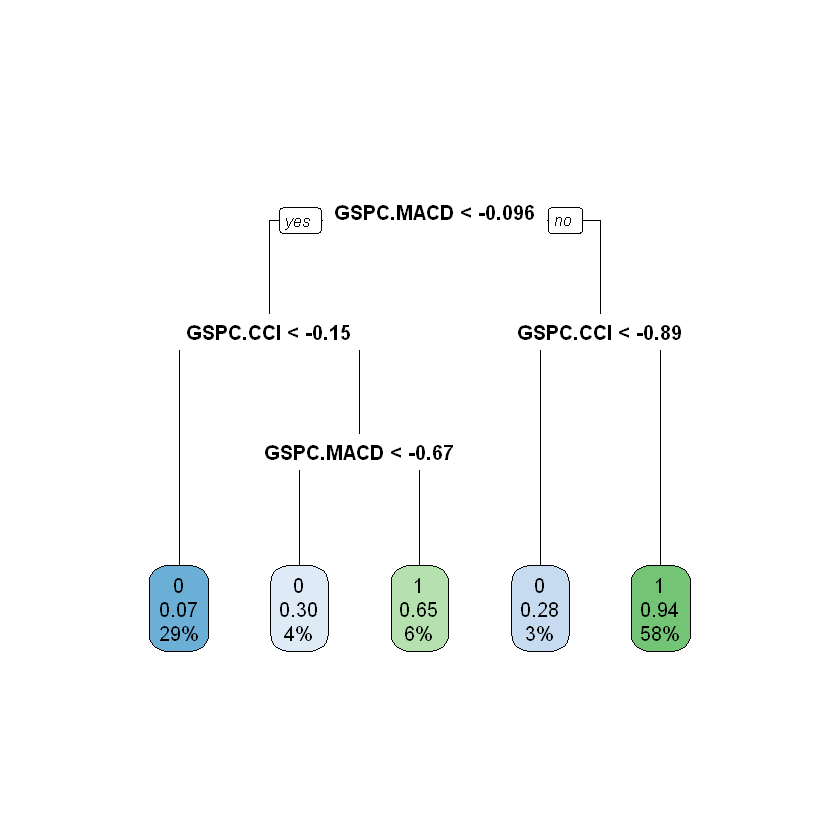

In [195]:
# Criação da árvore gráfica
rpart.plot(train.zscore.model.dt, type = 0, extra = 106, tweak = 1) 

In [196]:
# Importância dos atributos
train.zscore.imp <- varImp(train.zscore.model.dt, scale = F)
train.zscore.imp

,Overall
GSPC.CCI,1050.62581
GSPC.CMO,922.52147
GSPC.Histogram,70.84878
GSPC.MACD,999.78620
GSPC.Signal,613.74492
GSPC.StochD,595.00527
GSPC.StochK,126.17751
GSPC.WPR,126.17751
GSPC.High,0.00000
GSPC.Low,0.00000


In [197]:
# Previsão
train.zscore.dt.pred <- predict(train.zscore.model.dt,
                                GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                                type = "class")

In [198]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.dt.pred,
                      GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                    
train.zscore.dt.pred    0    1
                   0 1174  146
                   1  196 2150
                                          
               Accuracy : 0.9067          
                 95% CI : (0.8968, 0.9159)
    No Information Rate : 0.6263          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7992          
                                          
 Mcnemar's Test P-Value : 0.008058        
                                          
            Sensitivity : 0.8569          
            Specificity : 0.9364          
         Pos Pred Value : 0.8894          
         Neg Pred Value : 0.9165          
             Prevalence : 0.3737          
         Detection Rate : 0.3202          
   Detection Prevalence : 0.3601          
      Balanced Accuracy : 0.8967          
                                          
       'Positive' Class : 0         

Pelo % de acurácia, há indícios de *overfitting*.

**Dados de teste**

In [199]:
# Previsão
test.zscore.dt.pred <- predict(train.zscore.model.dt,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))],
                               type = "class")

In [200]:
# Matriz de Confusão de teste
confusionMatrix(table(test.zscore.dt.pred,
                      GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                   
test.zscore.dt.pred   0   1
                  0 502  72
                  1  97 959
                                          
               Accuracy : 0.8963          
                 95% CI : (0.8805, 0.9107)
    No Information Rate : 0.6325          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.775           
                                          
 Mcnemar's Test P-Value : 0.06487         
                                          
            Sensitivity : 0.8381          
            Specificity : 0.9302          
         Pos Pred Value : 0.8746          
         Neg Pred Value : 0.9081          
             Prevalence : 0.3675          
         Detection Rate : 0.3080          
   Detection Prevalence : 0.3521          
      Balanced Accuracy : 0.8841          
                                          
       'Positive' Class : 0               
   

Pelo % de acurácia, há indícios de *overfitting*.

### 7.2.2. Dados minmax

**Dados de treino**

In [201]:
# Criação da árvore de decisão
train.minmax.model.dt <- rpart(GSPC.Direction ~.,
                               GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                               method = "class")

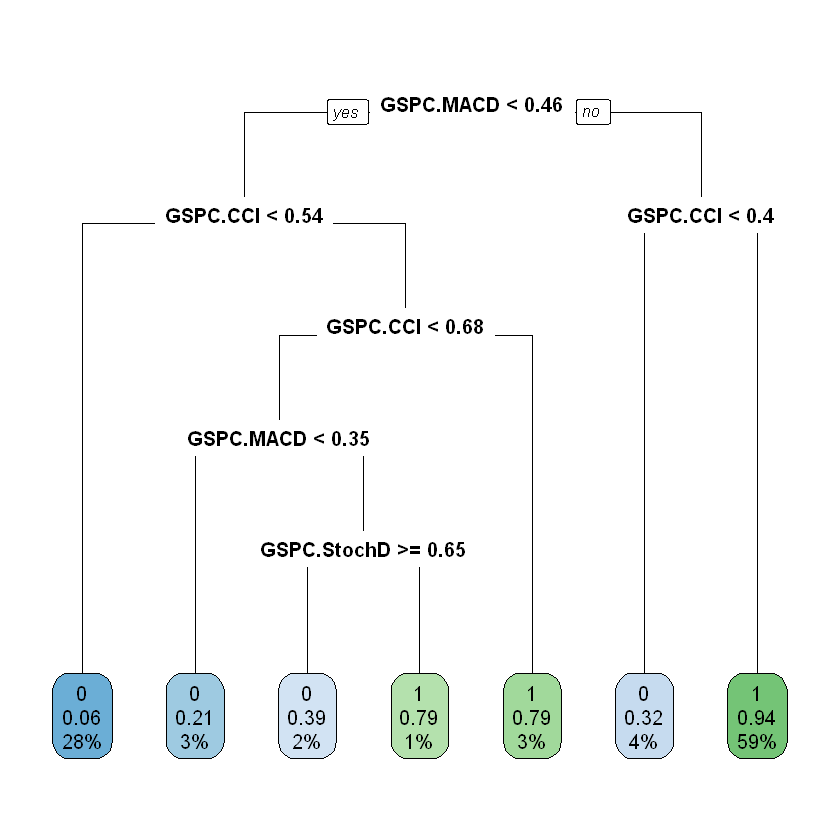

In [202]:
# Criação da árvore gráfica
rpart.plot(train.minmax.model.dt, type = 0, extra = 106, tweak = 1) 

In [203]:
# Importância dos atributos
train.minmax.imp <- varImp(train.minmax.model.dt, scale = F)
train.minmax.imp

,Overall
GSPC.CCI,1054.690843
GSPC.CMO,916.794021
GSPC.High,4.179654
GSPC.Histogram,73.607882
GSPC.MACD,1016.633949
GSPC.Signal,606.294963
GSPC.StochD,589.637102
GSPC.StochK,145.161416
GSPC.WPR,145.161416
GSPC.Low,0.000000


In [204]:
# Previsão
train.minmax.dt.pred <- predict(train.minmax.model.dt,
                                GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                                type = "class")

In [205]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.dt.pred,
                      GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                    
train.minmax.dt.pred    0    1
                   0 1210  166
                   1  159 2159
                                         
               Accuracy : 0.912          
                 95% CI : (0.9024, 0.921)
    No Information Rate : 0.6294         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8116         
                                         
 Mcnemar's Test P-Value : 0.7393         
                                         
            Sensitivity : 0.8839         
            Specificity : 0.9286         
         Pos Pred Value : 0.8794         
         Neg Pred Value : 0.9314         
             Prevalence : 0.3706         
         Detection Rate : 0.3276         
   Detection Prevalence : 0.3725         
      Balanced Accuracy : 0.9062         
                                         
       'Positive' Class : 0              
             

Pelo % de acurácia, há indícios de *overfitting*.

**Dados de teste**

In [206]:
# Previsão
test.minmax.dt.pred <- predict(train.minmax.model.dt,
                               GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))],
                               type = "class")

In [207]:
# Matriz de Confusão de teste
confusionMatrix(table(test.minmax.dt.pred,
                      GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                   
test.minmax.dt.pred   0   1
                  0 517  66
                  1  83 936
                                          
               Accuracy : 0.907           
                 95% CI : (0.8917, 0.9208)
    No Information Rate : 0.6255          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8003          
                                          
 Mcnemar's Test P-Value : 0.1899          
                                          
            Sensitivity : 0.8617          
            Specificity : 0.9341          
         Pos Pred Value : 0.8868          
         Neg Pred Value : 0.9185          
             Prevalence : 0.3745          
         Detection Rate : 0.3227          
   Detection Prevalence : 0.3639          
      Balanced Accuracy : 0.8979          
                                          
       'Positive' Class : 0               
   

Pelo % de acurácia, há indícios de *overfitting*.

## 7.3. Random Forest

O algoritmo de *random forest* trabalha agregando as predições realizadas pelas diversas *decision trees* de profundidade variável. Cada *decision tree* no algoritmo é treinado em um subconjunto de dataset (*bootstrapped dataset*).

A porção de amostras que foram deixadas durante a construção de cada decision tree no algoritmo é referenciada como *dataset out-of-bag* (OOB). O modelo irá automaticamente avaliar automaticamente seu desempenho rudando cada uma das amostras no dataset OOB através do algoritmo de *random forest*.

O critério de decisão para divisão de uma *decision tree* é por meio da impureza produzida por cada *feature* utilizando o índice de Gini ou entropia. No algoritmo de *random forest*, seleciona-se aleatoriamente um número predefinido de *features* candidatas. O último resultará em uma variância maior entre as árvores que, de certa forma, contenha as mesmas *features* (ou seja, aquelas que são altamente correlacionadas com o rótulo alvo).

Quando o algoritmo de *random forest* é utilizado para classificação e é apresentado com uma nova amostra, a predição final é feita tomando a maioria das predições realizadas por cada *decision treee* no *random forest*.

Obs.: *cross-validation* => utilizado para avaliar a eficiência de um modelo utilizando os dados de treinamento.

In [141]:
# Package
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked _by_ '.GlobalEnv':

    outlier

The following object is masked from 'package:ggplot2':

    margin



### 7.3.1. Dados z-score

**Dados de treino**

In [208]:
# Sintaxe básica
set.seed(123)
zscore.model.rf <- randomForest(as.factor(GSPC.Trend) ~ ., 
                                data = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction'))],
                                method = 'rf',
                                trControl = trainControl(method = 'cv', number = 5))
zscore.model.rf

# data = GSPC.zscore.train.rf => dados de treino
# method = 'rf' => utilização do algoritmo de random forest
# method = 'cv' => validação cruzada
# number = 5 => 5 folds for cross-validation


Call:
 randomForest(formula = as.factor(GSPC.Trend) ~ ., data = GSPC.zscore.train[,      !(names(GSPC.zscore.train) %in% c("GSPC.Direction"))], method = "rf",      trControl = trainControl(method = "cv", number = 5)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 8.62%
Confusion matrix:
     down   up class.error
down 1208  162  0.11824818
up    154 2142  0.06707317

Por default, o número de *decision trees* no *random forest* é 500 e o número de *features* utilizadas como candidatas potenciais para cada divisão é 3. O modelo automaticamente tentará classificar cada uma das amostras no dataset OOB e mostrará uma matriz de confusão com os resultados.

O número de variáveis experimentadas em cada split é baseada na seginte fórmula:

In [209]:
# Previsão
test.zscore.rf.pred <- predict(zscore.model.rf,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))])

In [210]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.zscore.rf.pred))

Confusion Matrix and Statistics

      test.zscore.rf.pred
       down  up
  down  515  84
  up     58 973
                                          
               Accuracy : 0.9129          
                 95% CI : (0.8981, 0.9261)
    No Information Rate : 0.6485          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8109          
                                          
 Mcnemar's Test P-Value : 0.03591         
                                          
            Sensitivity : 0.8988          
            Specificity : 0.9205          
         Pos Pred Value : 0.8598          
         Neg Pred Value : 0.9437          
             Prevalence : 0.3515          
         Detection Rate : 0.3160          
   Detection Prevalence : 0.3675          
      Balanced Accuracy : 0.9097          
                                          
       'Positive' Class : down            
                                 

Uma vez que este é um problema de classificação, utiliza-se uma matriz de confusão para avaliar o desempenho do modelo.

**Dados de teste**

In [213]:
# Previsão
test.zscore.rf.pred <- predict(zscore.model.rf,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))])

In [214]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.zscore.rf.pred))

Confusion Matrix and Statistics

      test.zscore.rf.pred
       down  up
  down  514  85
  up     60 971
                                          
               Accuracy : 0.911           
                 95% CI : (0.8962, 0.9244)
    No Information Rate : 0.6479          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.807           
                                          
 Mcnemar's Test P-Value : 0.04625         
                                          
            Sensitivity : 0.8955          
            Specificity : 0.9195          
         Pos Pred Value : 0.8581          
         Neg Pred Value : 0.9418          
             Prevalence : 0.3521          
         Detection Rate : 0.3153          
   Detection Prevalence : 0.3675          
      Balanced Accuracy : 0.9075          
                                          
       'Positive' Class : down            
                                 

### 7.3.2. Dados minmax

**Dados de treino**

In [215]:
# Sintaxe básica
set.seed(123)
minmax.model.rf <- randomForest(as.factor(GSPC.Trend) ~ ., 
                                data = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))], 
                                method = 'rf',
                                trControl = trainControl(method = 'cv', number = 5))
minmax.model.rf

# data = GSPC.zscore.train.rf => dados de treino
# method = 'rf' => utilização do algoritmo de random forest
# method = 'cv' => validação cruzada
# number = 5 => 5 folds for cross-validation


Call:
 randomForest(formula = as.factor(GSPC.Trend) ~ ., data = GSPC.minmax.train[,      !(names(GSPC.minmax.train) %in% c("GSPC.Direction"))], method = "rf",      trControl = trainControl(method = "cv", number = 5)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 8.8%
Confusion matrix:
     down   up class.error
down 1199  170  0.12417823
up    155 2170  0.06666667

In [216]:
# Previsão
train.minmax.rf.pred <- predict(minmax.model.rf, 
                                GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))])

In [217]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.minmax.train$GSPC.Trend, train.minmax.rf.pred))

Confusion Matrix and Statistics

      train.minmax.rf.pred
       down   up
  down 1369    0
  up      0 2325
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.6294    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.3706    
         Detection Rate : 0.3706    
   Detection Prevalence : 0.3706    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : down      
                                    

**Dados de teste**

In [218]:
# Previsão
test.minmax.rf.pred <- predict(minmax.model.rf,
                               GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))])

In [219]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.minmax.rf.pred))

Confusion Matrix and Statistics

      test.minmax.rf.pred
       down   up
  down 1369    0
  up      0 2325
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.6294    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.3706    
         Detection Rate : 0.3706    
   Detection Prevalence : 0.3706    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : down      
                                    

## 7.4. K Nearest Neighborhood

In [152]:
# Package
library(class)

In [153]:
# Definição do número de Neighborhoods    
neighborhood <- 3

# O número de neighborhoods corresponde ao número de direções (Up, Down, NoWhere)

### 7.4.1. Dados z-score

**Dados de treino**

In [220]:
# modelo avaliado por treino
set.seed(123)
train.zscore.knn.model <- knn(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.zscore.train$GSPC.Trend), neighborhood)   
head(train.zscore.knn.model)

[1] up up up up up up
Levels: down up

In [221]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.knn.model,
                      as.factor(GSPC.zscore.train$GSPC.Trend))) 

Confusion Matrix and Statistics

                      
train.zscore.knn.model down   up
                  down 1260  108
                  up    110 2188
                                         
               Accuracy : 0.9405         
                 95% CI : (0.9324, 0.948)
    No Information Rate : 0.6263         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8729         
                                         
 Mcnemar's Test P-Value : 0.946          
                                         
            Sensitivity : 0.9197         
            Specificity : 0.9530         
         Pos Pred Value : 0.9211         
         Neg Pred Value : 0.9521         
             Prevalence : 0.3737         
         Detection Rate : 0.3437         
   Detection Prevalence : 0.3732         
      Balanced Accuracy : 0.9363         
                                         
       'Positive' Class : down           
     

**Dados de teste**

In [222]:
set.seed(123)
test.zscore.knn.model <- knn(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.zscore.test[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.zscore.train$GSPC.Trend), neighborhood)   
head(test.zscore.knn.model)

[1] up   up   up   up   down up  
Levels: down up

In [223]:
# Matriz de Confusão de teste
confusionMatrix(table(test.zscore.knn.model, as.factor(GSPC.zscore.test$GSPC.Trend))) 

Confusion Matrix and Statistics

                     
test.zscore.knn.model down  up
                 down  500  77
                 up     99 954
                                          
               Accuracy : 0.892           
                 95% CI : (0.8759, 0.9067)
    No Information Rate : 0.6325          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7659          
                                          
 Mcnemar's Test P-Value : 0.1134          
                                          
            Sensitivity : 0.8347          
            Specificity : 0.9253          
         Pos Pred Value : 0.8666          
         Neg Pred Value : 0.9060          
             Prevalence : 0.3675          
         Detection Rate : 0.3067          
   Detection Prevalence : 0.3540          
      Balanced Accuracy : 0.8800          
                                          
       'Positive' Class : down     

### 7.4.2. Dados minmax

**Dados de treino**

In [224]:
# modelo avaliado por treino
set.seed(123)
train.minmax.knn.model <- knn(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.minmax.train$GSPC.Trend), neighborhood)   
head(train.minmax.knn.model)

[1] up up up up up up
Levels: down up

In [225]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.knn.model, as.factor(GSPC.minmax.train$GSPC.Trend))) 

Confusion Matrix and Statistics

                      
train.minmax.knn.model down   up
                  down 1233  113
                  up    136 2212
                                         
               Accuracy : 0.9326         
                 95% CI : (0.924, 0.9405)
    No Information Rate : 0.6294         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.855          
                                         
 Mcnemar's Test P-Value : 0.1633         
                                         
            Sensitivity : 0.9007         
            Specificity : 0.9514         
         Pos Pred Value : 0.9160         
         Neg Pred Value : 0.9421         
             Prevalence : 0.3706         
         Detection Rate : 0.3338         
   Detection Prevalence : 0.3644         
      Balanced Accuracy : 0.9260         
                                         
       'Positive' Class : down           
     

**Dados de teste**

In [226]:
set.seed(123)
test.minmax.knn.model <- knn(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.minmax.test[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.minmax.train$GSPC.Trend), neighborhood)   
head(test.minmax.knn.model)

[1] up   up   up   up   up   down
Levels: down up

In [227]:
# Matriz de Confusão de teste
confusionMatrix(table(test.minmax.knn.model, as.factor(GSPC.minmax.test$GSPC.Trend))) 

Confusion Matrix and Statistics

                     
test.minmax.knn.model down  up
                 down  490  79
                 up    110 923
                                          
               Accuracy : 0.882           
                 95% CI : (0.8652, 0.8974)
    No Information Rate : 0.6255          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7456          
                                          
 Mcnemar's Test P-Value : 0.0291          
                                          
            Sensitivity : 0.8167          
            Specificity : 0.9212          
         Pos Pred Value : 0.8612          
         Neg Pred Value : 0.8935          
             Prevalence : 0.3745          
         Detection Rate : 0.3059          
   Detection Prevalence : 0.3552          
      Balanced Accuracy : 0.8689          
                                          
       'Positive' Class : down     

## 7.5. Support Vector Machine

### 7.5.1. Dados z-score

**Dados de treino**

In [228]:
train.zscore.svm.model <- svm(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))],
                              as.factor(GSPC.zscore.train$GSPC.Trend))    
head(train.zscore.svm.model)

$call
svm.default(x = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% 
    c("GSPC.Direction", "GSPC.Trend"))], y = as.factor(GSPC.zscore.train$GSPC.Trend))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.05555556


In [229]:
# Predição
train.zscore.svm.pred <- predict(train.zscore.svm.model,
                                 GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(train.zscore.svm.pred, as.factor(GSPC.zscore.train$GSPC.Trend)))

Confusion Matrix and Statistics

                     
train.zscore.svm.pred down   up
                 down 1214  114
                 up    156 2182
                                          
               Accuracy : 0.9264          
                 95% CI : (0.9174, 0.9346)
    No Information Rate : 0.6263          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8417          
                                          
 Mcnemar's Test P-Value : 0.01259         
                                          
            Sensitivity : 0.8861          
            Specificity : 0.9503          
         Pos Pred Value : 0.9142          
         Neg Pred Value : 0.9333          
             Prevalence : 0.3737          
         Detection Rate : 0.3312          
   Detection Prevalence : 0.3622          
      Balanced Accuracy : 0.9182          
                                          
       'Positive' Class : down  

**Dados de teste**

In [230]:
# Predição
test.zscore.svm.pred <- predict(train.zscore.svm.model,
                                GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(test.zscore.svm.pred, as.factor(GSPC.zscore.test$GSPC.Trend)))

Confusion Matrix and Statistics

                    
test.zscore.svm.pred down  up
                down  515  63
                up     84 968
                                          
               Accuracy : 0.9098          
                 95% CI : (0.8949, 0.9233)
    No Information Rate : 0.6325          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8046          
                                          
 Mcnemar's Test P-Value : 0.09903         
                                          
            Sensitivity : 0.8598          
            Specificity : 0.9389          
         Pos Pred Value : 0.8910          
         Neg Pred Value : 0.9202          
             Prevalence : 0.3675          
         Detection Rate : 0.3160          
   Detection Prevalence : 0.3546          
      Balanced Accuracy : 0.8993          
                                          
       'Positive' Class : down         

### 7.5.2. Dados minmax

**Dados de treino**

In [231]:
train.minmax.svm.model <- svm(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))],
                              as.factor(GSPC.minmax.train$GSPC.Trend))    
head(train.minmax.svm.model)

$call
svm.default(x = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% 
    c("GSPC.Direction", "GSPC.Trend"))], y = as.factor(GSPC.minmax.train$GSPC.Trend))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.05882353


In [232]:
# Predição
train.minmax.svm.pred <- predict(train.minmax.svm.model,
                                 GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(train.minmax.svm.pred, as.factor(GSPC.minmax.train$GSPC.Trend)))

Confusion Matrix and Statistics

                     
train.minmax.svm.pred down   up
                 down 1201  125
                 up    168 2200
                                          
               Accuracy : 0.9207          
                 95% CI : (0.9115, 0.9292)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8289          
                                          
 Mcnemar's Test P-Value : 0.01414         
                                          
            Sensitivity : 0.8773          
            Specificity : 0.9462          
         Pos Pred Value : 0.9057          
         Neg Pred Value : 0.9291          
             Prevalence : 0.3706          
         Detection Rate : 0.3251          
   Detection Prevalence : 0.3590          
      Balanced Accuracy : 0.9118          
                                          
       'Positive' Class : down  

**Dados de teste**

In [233]:
# Predição
test.minmax.svm.pred <- predict(train.minmax.svm.model,
                                GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(test.minmax.svm.pred, as.factor(GSPC.minmax.test$GSPC.Trend)))

Confusion Matrix and Statistics

                    
test.minmax.svm.pred down  up
                down  511  48
                up     89 954
                                          
               Accuracy : 0.9145          
                 95% CI : (0.8997, 0.9277)
    No Information Rate : 0.6255          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8149          
                                          
 Mcnemar's Test P-Value : 0.0006322       
                                          
            Sensitivity : 0.8517          
            Specificity : 0.9521          
         Pos Pred Value : 0.9141          
         Neg Pred Value : 0.9147          
             Prevalence : 0.3745          
         Detection Rate : 0.3190          
   Detection Prevalence : 0.3489          
      Balanced Accuracy : 0.9019          
                                          
       'Positive' Class : down         